# Data wrangling and EDA

In this section, we will perform data wrangling and exploratory data analysis (EDA). We aim to explore the data, fill in any missing values, and investigate the distribution of features. Additionally, we will assess the significance of items, stores, states, and years in the dataset.

## 1-Imports

In [498]:
#Import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2-Load the data


In [433]:
# Load The Data: sell prices, calendar, and sales data
price=pd.read_csv('../Data/sell_prices.csv')
sales=pd.read_csv('../Data/sales_train.csv')
calendar=pd.read_csv('../Data/calendar.csv')

## 3-Explore the data

In [287]:
#use the head method to see the first several rows of the data
price.head()

store_id      item_id  wm_yr_wk  sell_price
0     CA_1  FOODS_1_001     11101         2.0
1     CA_1  FOODS_1_001     11102         2.0
2     CA_1  FOODS_1_001     11103         2.0
3     CA_1  FOODS_1_001     11104         2.0
4     CA_1  FOODS_1_001     11105         2.0

In [619]:
calendar.head()

date  wm_yr_wk    weekday  wday  month  year  day event_name_1  \
0  1/29/11     11101   Saturday     1      1  2011  d_1          NaN   
1  1/30/11     11101     Sunday     2      1  2011  d_2          NaN   
2  1/31/11     11101     Monday     3      1  2011  d_3          NaN   
3   2/1/11     11101    Tuesday     4      2  2011  d_4          NaN   
4   2/2/11     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1

In [289]:
sales.head()

id      item_id  dept_id cat_id store_id state_id  \
0  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1       CA   
1  FOODS_1_002_CA_1_validation  FOODS_1_002  FOODS_1  FOODS     CA_1       CA   
2  FOODS_1_003_CA_1_validation  FOODS_1_003  FOODS_1  FOODS     CA_1       CA   
3  FOODS_1_004_CA_1_validation  FOODS_1_004  FOODS_1  FOODS     CA_1       CA   
4  FOODS_1_005_CA_1_validation  FOODS_1_005  FOODS_1  FOODS     CA_1       CA   

   d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  d_1908  d_1909  \
0    3    0    0    1  ...       0       2       0       4       1       1   
1    0    1    0    1  ...       1       3       1       0       0       1   
2    0    0    0    0  ...       3       0       2       1       1       0   
3    0    0    0    0  ...       0       0       0       0       0       0   
4    3    9    3    3  ...       3       1       1       2       0       2   

   d_1910  d_1911  d_1912  d_1913  
0       0       1       1       0  
1       2       0       0       0  
2       1       0       1       0  
3       0       0       0       0  
4       2       1       4       1  

[5 rows x 1919 columns]

In [290]:
#use the info method to see a summary of the data
price.info()
sales.info()
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   store_id    26083 non-null  object 
 1   item_id     26083 non-null  object 
 2   wm_yr_wk    26083 non-null  int64  
 3   sell_price  26083 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 815.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          19

Firstly, we need to transform the sales table. Our objective is to convert the table from a wide format to a long format, where each day (d_1 to d_1913)represented in the columns becomes a separate row.

In [434]:
# Use df.melt() to unpivot columns d_1 to d_1913 into rows
sales_melt=sales.melt(id_vars=['id','item_id',	'dept_id','cat_id','store_id','state_id'],value_name='sales',var_name='day')

In [319]:
sales_melt.head()

id      item_id  dept_id cat_id store_id state_id  \
0  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1       CA   
1  FOODS_1_002_CA_1_validation  FOODS_1_002  FOODS_1  FOODS     CA_1       CA   
2  FOODS_1_003_CA_1_validation  FOODS_1_003  FOODS_1  FOODS     CA_1       CA   
3  FOODS_1_004_CA_1_validation  FOODS_1_004  FOODS_1  FOODS     CA_1       CA   
4  FOODS_1_005_CA_1_validation  FOODS_1_005  FOODS_1  FOODS     CA_1       CA   

   day  sales  
0  d_1      3  
1  d_1      0  
2  d_1      0  
3  d_1      0  
4  d_1      3

In [308]:
sales_melt.shape

(191300, 8)

Now, we want to merge the sales table with the calendar table using the 'day' column as the key.

In [435]:
#Perform a left join on column 'day' 
sales_calendar_merge=sales_melt.merge(calendar, on='day',how='left')

In [310]:
sales_calendar_merge

id      item_id  dept_id cat_id store_id  \
0       FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
1       FOODS_1_002_CA_1_validation  FOODS_1_002  FOODS_1  FOODS     CA_1   
2       FOODS_1_003_CA_1_validation  FOODS_1_003  FOODS_1  FOODS     CA_1   
3       FOODS_1_004_CA_1_validation  FOODS_1_004  FOODS_1  FOODS     CA_1   
4       FOODS_1_005_CA_1_validation  FOODS_1_005  FOODS_1  FOODS     CA_1   
...                             ...          ...      ...    ...      ...   
191295  FOODS_1_006_WI_3_validation  FOODS_1_006  FOODS_1  FOODS     WI_3   
191296  FOODS_1_008_WI_3_validation  FOODS_1_008  FOODS_1  FOODS     WI_3   
191297  FOODS_1_009_WI_3_validation  FOODS_1_009  FOODS_1  FOODS     WI_3   
191298  FOODS_1_010_WI_3_validation  FOODS_1_010  FOODS_1  FOODS     WI_3   
191299  FOODS_1_011_WI_3_validation  FOODS_1_011  FOODS_1  FOODS     WI_3   

       state_id     day  sales     date  wm_yr_wk  ... wday  month  year  \
0            CA     d_1      3  1/29/11     11101  ...    1      1  2011   
1            CA     d_1      0  1/29/11     11101  ...    1      1  2011   
2            CA     d_1      0  1/29/11     11101  ...    1      1  2011   
3            CA     d_1      0  1/29/11     11101  ...    1      1  2011   
4            CA     d_1      3  1/29/11     11101  ...    1      1  2011   
...         ...     ...    ...      ...       ...  ...  ...    ...   ...   
191295       WI  d_1913      0  4/24/16     11613  ...    2      4  2016   
191296       WI  d_1913      0  4/24/16     11613  ...    2      4  2016   
191297       WI  d_1913      1  4/24/16     11613  ...    2      4  2016   
191298       WI  d_1913      3  4/24/16     11613  ...    2      4  2016   
191299       WI  d_1913      0  4/24/16     11613  ...    2      4  2016   

        event_name_1 event_type_1 event_name_2 event_type_2 snap_CA  snap_TX  \
0                NaN          NaN          NaN          NaN       0        0   
1                NaN          NaN          NaN          NaN       0        0   
2                NaN          NaN          NaN          NaN       0        0   
3                NaN          NaN          NaN          NaN       0        0   
4                NaN          NaN          NaN          NaN       0        0   
...              ...          ...          ...          ...     ...      ...   
191295           NaN          NaN          NaN          NaN       0        0   
191296           NaN          NaN          NaN          NaN       0        0   
191297           NaN          NaN          NaN          NaN       0        0   
191298           NaN          NaN          NaN          NaN       0        0   
191299           NaN          NaN          NaN          NaN       0        0   

        snap_WI  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
191295        0  
191296        0  
191297        0  
191298        0  
191299        0  

[191300 rows x 21 columns]

The price table contains prices for each item and store per week. We want to merge the sales_calendar_merge table with the price table to obtain the price of each item accordingly.

In [436]:
#Perform a left join on columns 'store_id','item_id', and 'wm_yr_wk' 
food_sales_daily=sales_calendar_merge.merge(price, on=['store_id','item_id','wm_yr_wk'],how='left')

In [322]:
food_sales_daily

id      item_id  dept_id cat_id store_id  \
0       FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
1       FOODS_1_002_CA_1_validation  FOODS_1_002  FOODS_1  FOODS     CA_1   
2       FOODS_1_003_CA_1_validation  FOODS_1_003  FOODS_1  FOODS     CA_1   
3       FOODS_1_004_CA_1_validation  FOODS_1_004  FOODS_1  FOODS     CA_1   
4       FOODS_1_005_CA_1_validation  FOODS_1_005  FOODS_1  FOODS     CA_1   
...                             ...          ...      ...    ...      ...   
191295  FOODS_1_006_WI_3_validation  FOODS_1_006  FOODS_1  FOODS     WI_3   
191296  FOODS_1_008_WI_3_validation  FOODS_1_008  FOODS_1  FOODS     WI_3   
191297  FOODS_1_009_WI_3_validation  FOODS_1_009  FOODS_1  FOODS     WI_3   
191298  FOODS_1_010_WI_3_validation  FOODS_1_010  FOODS_1  FOODS     WI_3   
191299  FOODS_1_011_WI_3_validation  FOODS_1_011  FOODS_1  FOODS     WI_3   

       state_id     day  sales     date  wm_yr_wk  ... month  year  \
0            CA     d_1      3  1/29/11     11101  ...     1  2011   
1            CA     d_1      0  1/29/11     11101  ...     1  2011   
2            CA     d_1      0  1/29/11     11101  ...     1  2011   
3            CA     d_1      0  1/29/11     11101  ...     1  2011   
4            CA     d_1      3  1/29/11     11101  ...     1  2011   
...         ...     ...    ...      ...       ...  ...   ...   ...   
191295       WI  d_1913      0  4/24/16     11613  ...     4  2016   
191296       WI  d_1913      0  4/24/16     11613  ...     4  2016   
191297       WI  d_1913      1  4/24/16     11613  ...     4  2016   
191298       WI  d_1913      3  4/24/16     11613  ...     4  2016   
191299       WI  d_1913      0  4/24/16     11613  ...     4  2016   

        event_name_1  event_type_1 event_name_2 event_type_2 snap_CA snap_TX  \
0               None          None         None         None       0       0   
1               None          None         None         None       0       0   
2               None          None         None         None       0       0   
3               None          None         None         None       0       0   
4               None          None         None         None       0       0   
...              ...           ...          ...          ...     ...     ...   
191295          None          None         None         None       0       0   
191296          None          None         None         None       0       0   
191297          None          None         None         None       0       0   
191298          None          None         None         None       0       0   
191299          None          None         None         None       0       0   

        snap_WI  sell_price  
0             0        2.00  
1             0        7.88  
2             0        2.88  
3             0         NaN  
4             0        2.94  
...         ...         ...  
191295        0        2.48  
191296        0        3.54  
191297        0        2.24  
191298        0        6.77  
191299        0        2.68  

[191300 rows x 22 columns]

In [323]:
food_sales_daily.to_csv('../Data/walmart_food_sales.csv')

In [437]:
#Perform summary statistics on numeric features
food_sales_daily.describe()

sales       wm_yr_wk           wday          month  \
count  191300.000000  191300.000000  191300.000000  191300.000000   
mean        1.228447   11339.191323       3.997386       6.357554   
std         3.487956     150.374573       2.000657       3.458782   
min         0.000000   11101.000000       1.000000       1.000000   
25%         0.000000   11217.000000       2.000000       3.000000   
50%         0.000000   11333.000000       4.000000       6.000000   
75%         1.000000   11448.000000       6.000000       9.000000   
max       116.000000   11613.000000       7.000000      12.000000   

                year        snap_CA        snap_TX        snap_WI  \
count  191300.000000  191300.000000  191300.000000  191300.000000   
mean     2013.209096       0.329326       0.329326       0.329326   
std         1.532090       0.469970       0.469970       0.469970   
min      2011.000000       0.000000       0.000000       0.000000   
25%      2012.000000       0.000000       0.000000       0.000000   
50%      2013.000000       0.000000       0.000000       0.000000   
75%      2015.000000       1.000000       1.000000       1.000000   
max      2016.000000       1.000000       1.000000       1.000000   

          sell_price  
count  176481.000000  
mean        3.596316  
std         2.162246  
min         0.100000  
25%         2.240000  
50%         2.880000  
75%         3.540000  
max         9.480000

The target variable is the number of sales as we aim to predict the daily quantity of sales for each item at each store.

### Check for missing data

We want to count and arrange the missing values in each column.

In [438]:
# check if there is any missing values
food_sales_daily.isna().sum().sort_values(ascending=False)

event_type_2    190900
event_name_2    190900
event_type_1    175900
event_name_1    175900
sell_price       14819
item_id              0
snap_WI              0
snap_TX              0
snap_CA              0
year                 0
month                0
id                   0
weekday              0
wm_yr_wk             0
date                 0
sales                0
day                  0
state_id             0
store_id             0
cat_id               0
dept_id              0
wday                 0
dtype: int64

The null columns for the event type and name columns are the ones with no event. We can fill these cells with 'None'.

In [439]:
food_sales_daily[['event_type_2','event_type_1','event_name_1','event_name_2']]=food_sales_daily[['event_type_2','event_type_1','event_name_1','event_name_2']].fillna('None')

In [440]:
food_sales_daily.isna().sum().sort_values(ascending=False)

sell_price      14819
item_id             0
snap_WI             0
snap_TX             0
snap_CA             0
event_type_2        0
event_name_2        0
event_type_1        0
event_name_1        0
year                0
month               0
id                  0
weekday             0
wm_yr_wk            0
date                0
sales               0
day                 0
state_id            0
store_id            0
cat_id              0
dept_id             0
wday                0
dtype: int64

Now, we want to investigate further into the missing prices to determine which items are affected in which years/states.

In [441]:
def miisings(df):
    items_miss=df['item_id'].unique()
    years_miss=df['year'].unique()
    states_miss=df['state_id'].unique()
    print(items_miss,years_miss,states_miss)

In [442]:
sales_missing_price_1=food_sales_daily[food_sales_daily['sell_price'].isnull()]
miisings(sales_missing_price_1)

['FOODS_1_004' 'FOODS_1_008' 'FOODS_1_009' 'FOODS_1_010' 'FOODS_1_011'
 'FOODS_1_002' 'FOODS_1_001' 'FOODS_1_005'] [2011 2012 2013] ['CA' 'TX' 'WI']


There are 14,819 rows with missing values in the 'sell_price' column for the above items/stores and years. First, we fill the missing values with the mean of each year for each item at each store.

In [443]:
# Group by 'item_id', 'year', and 'state_id', and calculate the mean sell_price for each group
mean_sell_price=food_sales_daily.groupby(['item_id','year','state_id'])['sell_price'].transform('mean')

# Fill missing sell_price values with the mean sell_price for each group
food_sales_daily['sell_price']=food_sales_daily['sell_price'].fillna(mean_sell_price)

In [444]:
food_sales_daily.isna().sum().sort_values(ascending=False)

sell_price      7751
item_id            0
snap_WI            0
snap_TX            0
snap_CA            0
event_type_2       0
event_name_2       0
event_type_1       0
event_name_1       0
year               0
month              0
id                 0
weekday            0
wm_yr_wk           0
date               0
sales              0
day                0
state_id           0
store_id           0
cat_id             0
dept_id            0
wday               0
dtype: int64

In [445]:
sales_missing_price_2=food_sales_daily[food_sales_daily['sell_price'].isnull()]
miisings(sales_missing_price_2)

['FOODS_1_004' 'FOODS_1_009' 'FOODS_1_010'] [2011] ['CA' 'TX' 'WI']


It appears that there are still 7,751 rows with missing values in the sell_price column for certain items in 2011. Since there is no data available for these items in 2011, we will use the data from the following year to fill in the missing values.

In [446]:
# Filter the data for the year 2012
sales_2012 = food_sales_daily[food_sales_daily['year'] == 2012]

# Group by item_id and store_id and get the average sell_price for each group
average_prices_2012 = sales_2012.groupby(['item_id', 'store_id'])['sell_price'].mean().round(2).reset_index()

# Merge the average prices back to the main DataFrame for the year 2011 where sell_price is missing
sales = pd.merge(food_sales_daily, average_prices_2012, on=['item_id', 'store_id'], suffixes=('_2011', '_2012'), how='left')

# Fill missing sell_price_2011 values with sell_price_2012 values
sales['sell_price_2011'].fillna(sales['sell_price_2012'], inplace=True)

# Drop the sell_price_2012 column as it is no longer needed
sales.drop('sell_price_2012', axis=1, inplace=True)

sales.rename(columns={'sell_price_2011': 'sell_price'}, inplace=True)
sales

id      item_id  dept_id cat_id store_id  \
0       FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
1       FOODS_1_002_CA_1_validation  FOODS_1_002  FOODS_1  FOODS     CA_1   
2       FOODS_1_003_CA_1_validation  FOODS_1_003  FOODS_1  FOODS     CA_1   
3       FOODS_1_004_CA_1_validation  FOODS_1_004  FOODS_1  FOODS     CA_1   
4       FOODS_1_005_CA_1_validation  FOODS_1_005  FOODS_1  FOODS     CA_1   
...                             ...          ...      ...    ...      ...   
191295  FOODS_1_006_WI_3_validation  FOODS_1_006  FOODS_1  FOODS     WI_3   
191296  FOODS_1_008_WI_3_validation  FOODS_1_008  FOODS_1  FOODS     WI_3   
191297  FOODS_1_009_WI_3_validation  FOODS_1_009  FOODS_1  FOODS     WI_3   
191298  FOODS_1_010_WI_3_validation  FOODS_1_010  FOODS_1  FOODS     WI_3   
191299  FOODS_1_011_WI_3_validation  FOODS_1_011  FOODS_1  FOODS     WI_3   

       state_id     day  sales     date  wm_yr_wk  ... month  year  \
0            CA     d_1      3  1/29/11     11101  ...     1  2011   
1            CA     d_1      0  1/29/11     11101  ...     1  2011   
2            CA     d_1      0  1/29/11     11101  ...     1  2011   
3            CA     d_1      0  1/29/11     11101  ...     1  2011   
4            CA     d_1      3  1/29/11     11101  ...     1  2011   
...         ...     ...    ...      ...       ...  ...   ...   ...   
191295       WI  d_1913      0  4/24/16     11613  ...     4  2016   
191296       WI  d_1913      0  4/24/16     11613  ...     4  2016   
191297       WI  d_1913      1  4/24/16     11613  ...     4  2016   
191298       WI  d_1913      3  4/24/16     11613  ...     4  2016   
191299       WI  d_1913      0  4/24/16     11613  ...     4  2016   

        event_name_1  event_type_1 event_name_2 event_type_2 snap_CA snap_TX  \
0               None          None         None         None       0       0   
1               None          None         None         None       0       0   
2               None          None         None         None       0       0   
3               None          None         None         None       0       0   
4               None          None         None         None       0       0   
...              ...           ...          ...          ...     ...     ...   
191295          None          None         None         None       0       0   
191296          None          None         None         None       0       0   
191297          None          None         None         None       0       0   
191298          None          None         None         None       0       0   
191299          None          None         None         None       0       0   

        snap_WI  sell_price  
0             0        2.00  
1             0        7.88  
2             0        2.88  
3             0        1.78  
4             0        2.94  
...         ...         ...  
191295        0        2.48  
191296        0        3.54  
191297        0        2.24  
191298        0        6.77  
191299        0        2.68  

[191300 rows x 22 columns]

In [447]:
#check for missing 
sales_filled.isna().sum()

id                 0
item_id            0
dept_id            0
cat_id             0
store_id           0
state_id           0
day                0
sales              0
date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
event_name_1       0
event_type_1       0
event_name_2       0
event_type_2       0
snap_CA            0
snap_TX            0
snap_WI            0
sell_price_2011    0
dtype: int64

There is no missing value in the data anymore. 

"dept_id" and "cat_id" columns have no use in our project as they each show only one value. Therefore, we are removing them from the data

In [448]:
#remove dept_id and cat_id
sales.drop(columns=['dept_id','cat_id'], inplace=True)

In our dataset, we initially had separate columns for SNAP flags indicating whether stores in California (snap_CA), Texas (snap_TX), and Wisconsin (snap_WI) allowed SNAP purchases on a given date. However, after merging our calendar and sales data, each row now represents a unique combination of date, an item, and a store. As a result, we consolidated the individual SNAP flags for each state into a single column denoting overall SNAP availability. This consolidation streamlines our analysis, allowing us to efficiently capture the SNAP policy for each store-item pair and providing a clear representation of SNAP availability across our dataset.

In [641]:
# add a column 'snap' to the data 
sales['snap'] = np.where(sales['state_id'] == 'CA', sales['snap_CA'],
                         np.where(sales['state_id'] == 'TX', sales['snap_TX'],
                                  sales['snap_WI']))

In [651]:
#Check the accuracy of the column. 
#In total, each state has 630 days for SNAP, with 10 stores and 10 items, resulting in a total of 63,000 SNAP days
sales['snap'].sum()

63000

In [ ]:
#drop snap_CA, snap_TX, and snap_WI
sales.drop(columns=['snap_CA','snap_TX','snap_WI'],inplace=True)

In [652]:
#save the data with no missing value
sales.to_csv('../Data/walmart_food_sales_filled.csv')

#### Number of Unique Values in Features

We aim to determine the distinct values in each feature.

In [419]:
#Estimate number of unique values for some features
food_item=sales_filled['item_id'].unique().size
stores=sales_filled['store_id'].unique().size
states=sales_filled['state_id'].unique().size
year=sales_filled['year'].unique().size

print(f'food item={food_item}, stores={stores}, states= {states}, year= {year}')

food item=10, stores=10, states= 3, year= 6


In [607]:
#unique values for  item, store, state, and year
food_item=sales_filled['item_id'].unique()
stores=sales_filled['store_id'].unique()
states=sales_filled['state_id'].unique()
year=sales_filled['year'].unique()
print(f'food item={food_item},\n stores={stores},\n states= {states},\n year= {year}')

food item=['FOODS_1_001' 'FOODS_1_002' 'FOODS_1_003' 'FOODS_1_004' 'FOODS_1_005'
 'FOODS_1_006' 'FOODS_1_008' 'FOODS_1_009' 'FOODS_1_010' 'FOODS_1_011'],
 stores=['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3'],
 states= ['CA' 'TX' 'WI'],
 year= [2011 2012 2013 2014 2015 2016]


The data contain 10 food items available for sale in 10 stores across three states: 4 stores in California, 3 stores in Texas, and 3 stores in Wisconsin, spanning from the years 2011 to 2016. 

These unique values can provide insights into the distribution and characteristics of our data, offering valuable understanding of the variability and patterns within the dataset.

In [425]:
#Perform summary statistics on numeric features
sales.describe()

sales       wm_yr_wk           wday          month  \
count  191300.000000  191300.000000  191300.000000  191300.000000   
mean        1.228447   11339.191323       3.997386       6.357554   
std         3.487956     150.374573       2.000657       3.458782   
min         0.000000   11101.000000       1.000000       1.000000   
25%         0.000000   11217.000000       2.000000       3.000000   
50%         0.000000   11333.000000       4.000000       6.000000   
75%         1.000000   11448.000000       6.000000       9.000000   
max       116.000000   11613.000000       7.000000      12.000000   

                year        snap_CA        snap_TX        snap_WI  \
count  191300.000000  191300.000000  191300.000000  191300.000000   
mean     2013.209096       0.329326       0.329326       0.329326   
std         1.532090       0.469970       0.469970       0.469970   
min      2011.000000       0.000000       0.000000       0.000000   
25%      2012.000000       0.000000       0.000000       0.000000   
50%      2013.000000       0.000000       0.000000       0.000000   
75%      2015.000000       1.000000       1.000000       1.000000   
max      2016.000000       1.000000       1.000000       1.000000   

       sell_price_2011  
count    191300.000000  
mean          3.579495  
std           2.131105  
min           0.100000  
25%           2.240000  
50%           2.680000  
75%           3.540000  
max           9.480000

## 4-Distribution of feature values

Looking at distributions of features to get a feel for whether the values look sensible and whether there are any obvious outliers to investigate.

array([[<AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'wm_yr_wk'}>,
        <AxesSubplot:title={'center':'wday'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'snap_CA'}>],
       [<AxesSubplot:title={'center':'snap_TX'}>,
        <AxesSubplot:title={'center':'snap_WI'}>,
        <AxesSubplot:title={'center':'sell_price_2011'}>]], dtype=object)

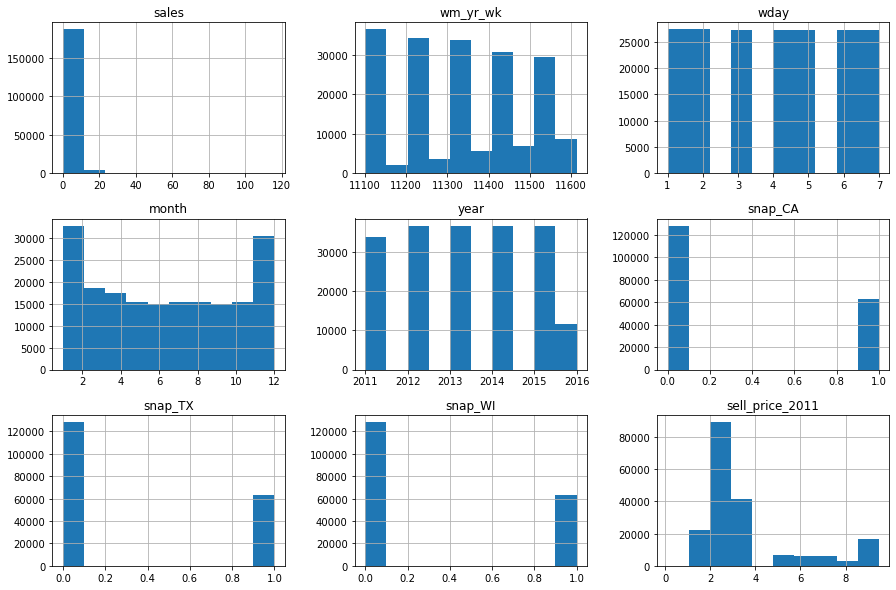

In [426]:
#Use hist method to plot histograms of each of numeric features
sales.hist(figsize=(15,10))

In [519]:
#checking for sales greater than 40 
sales[sales['sales']>35]['item_id'].unique()

array(['FOODS_1_004'], dtype=object)

In [520]:
#checking for sales greater than 40 
percent=(sales[sales['sales']<25]['item_id'].count()/sales['item_id'].count())*100
print(percent.round(2))

99.56


The sales distribution shows that the majority of sales fall below 25 units, accounting for 99.56% of all sales. Only food item 4 stands out with sales exceeding 35 units, while all other items have sales below this threshold.

Now, we want to check the distributions of features for categorical variables like state and store.

In [496]:
sales['store_id'].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [512]:
sales['state_id'].unique()

array(['CA', 'TX', 'WI'], dtype=object)

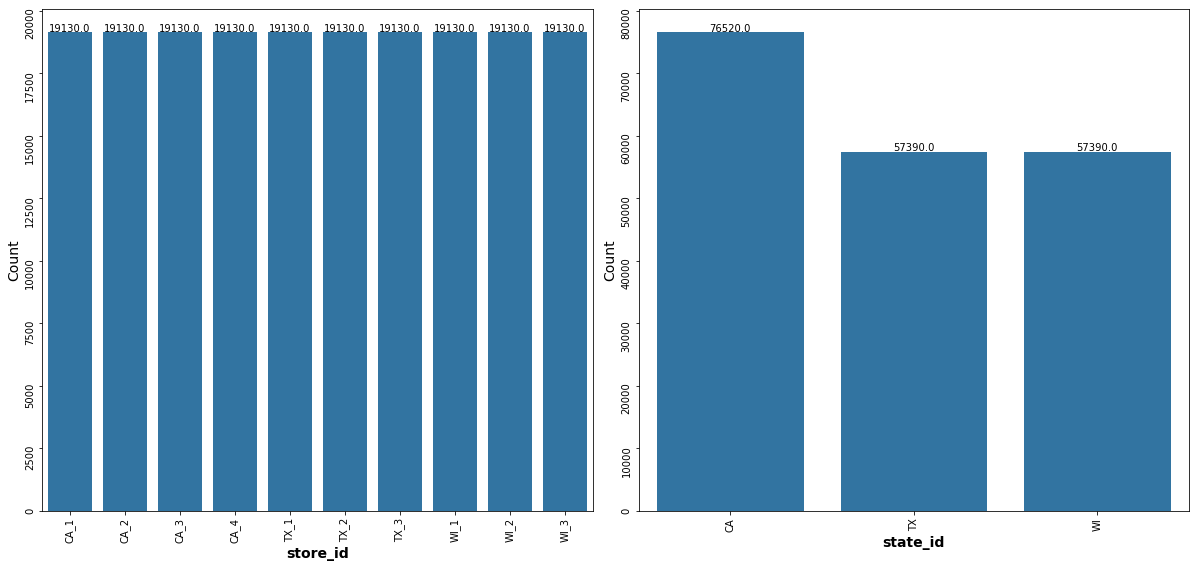

In [595]:
# for categorical variables

# Define categorical column values
cat_col_value = {
    'store_id': ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3'],
    'state_id': ['CA', 'TX', 'WI']
}

# Plotting count plots for each categorical variable
plt.figure(figsize=(25, 8))
for index, (category, value) in enumerate(cat_col_value.items(), 1):
    plt.subplot(1, 3, index)
    ax = sns.countplot(x=category, data=sales, order=value)
    ax.set_xlabel(category, fontsize=14, fontweight='bold')
    ax.set_ylabel('Count', fontsize=14)
    ax.tick_params(labelrotation=90)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

Store and state distribution shows that for all stores, the data is available for all items and dates.

### Daily sales

Plotting the total daily sales for each item both separately and combined in one figure.

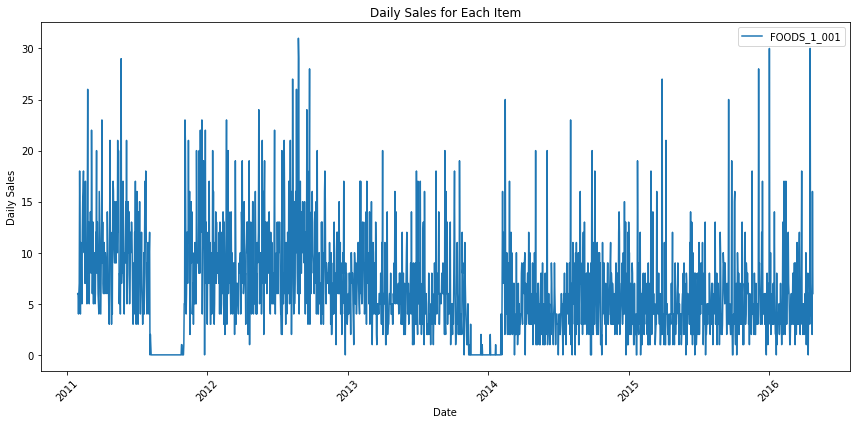

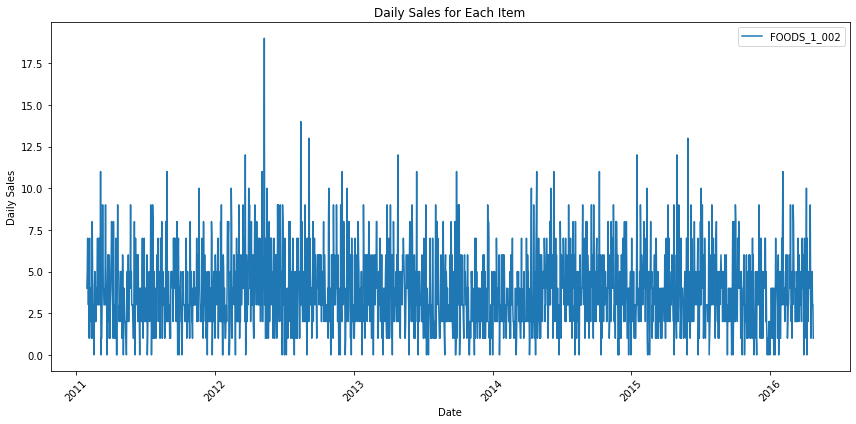

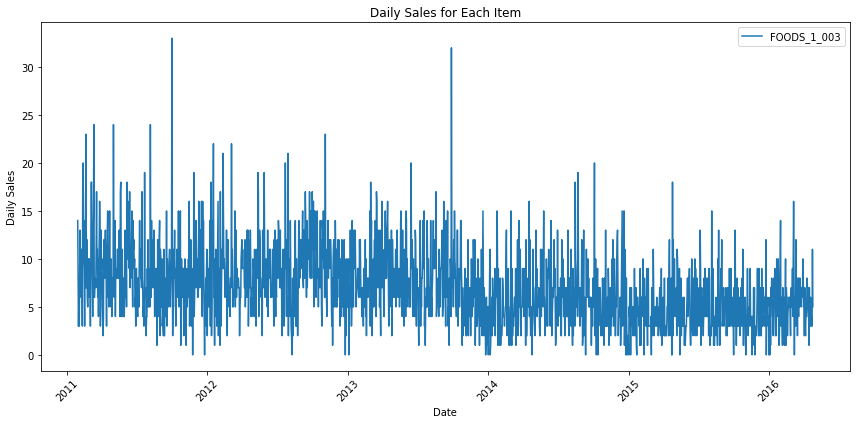

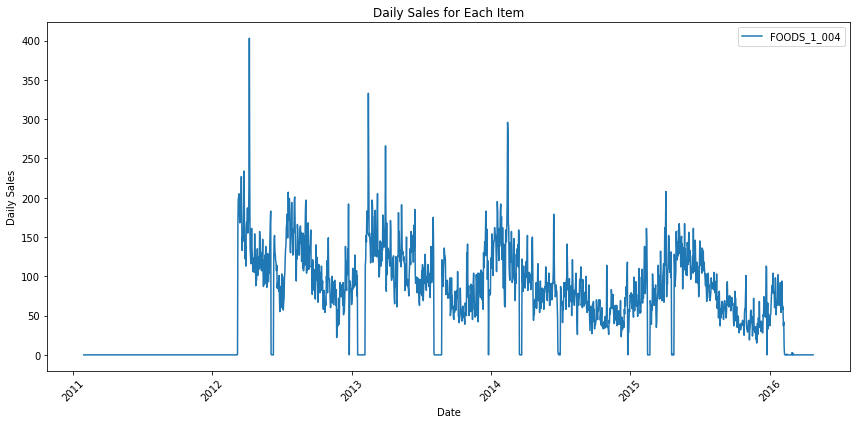

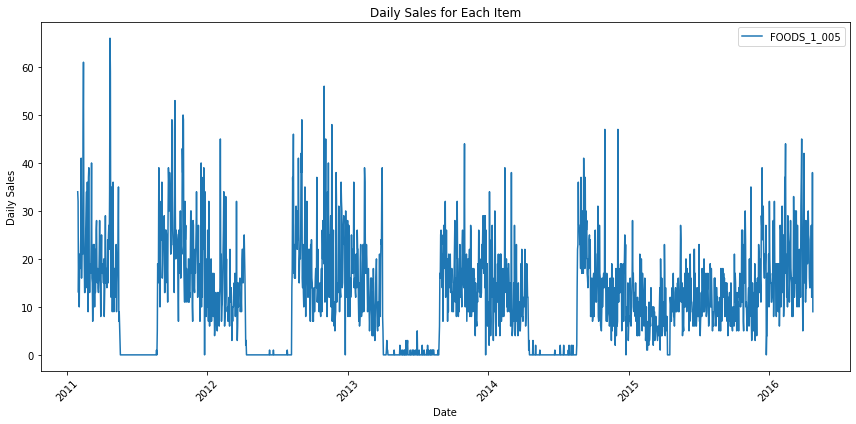

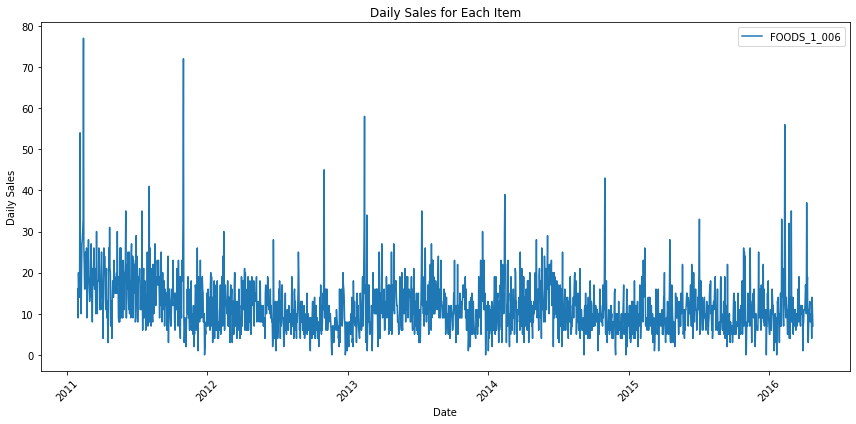

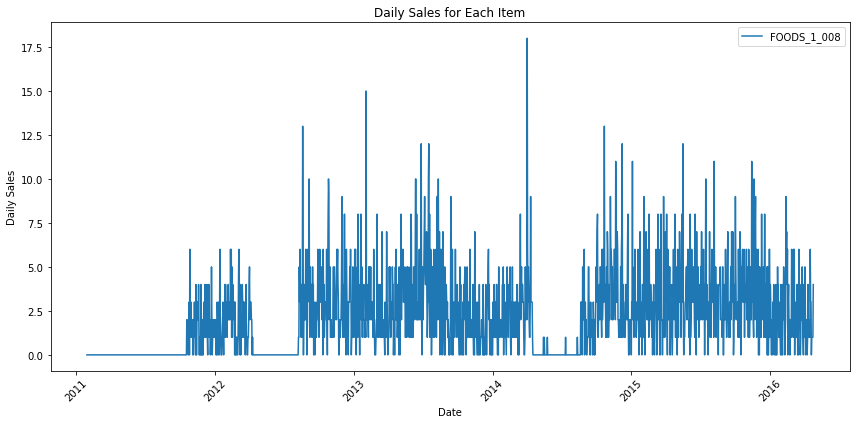

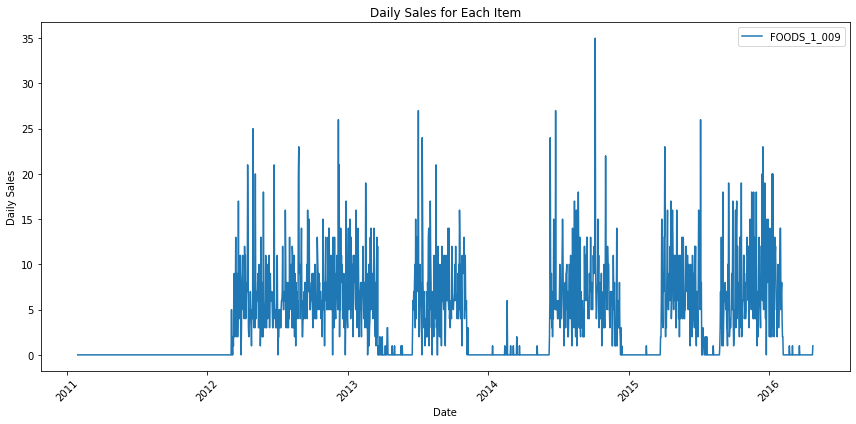

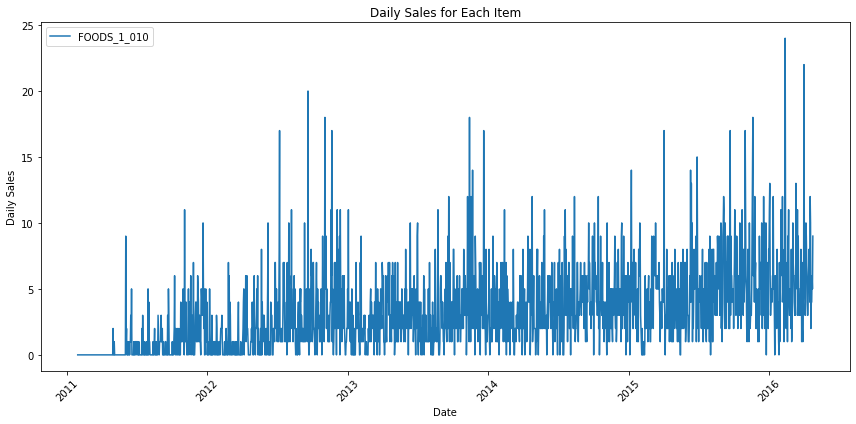

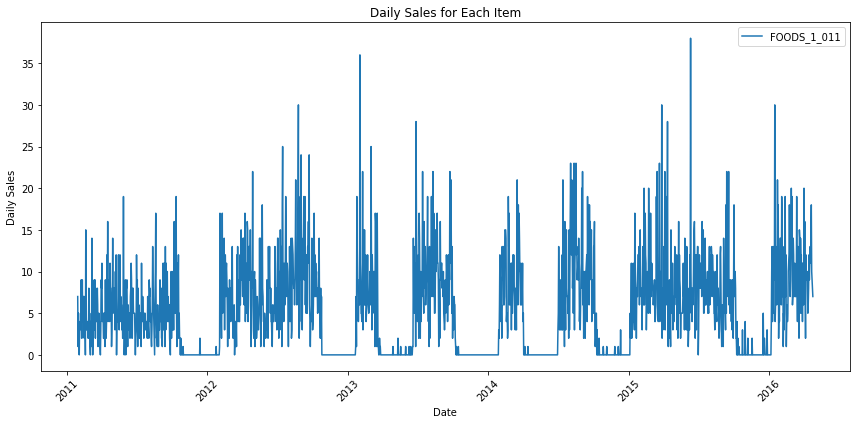

In [493]:
#plot sum of daily sales for each item

# Convert 'date' column to datetime format
#sales['date'] = pd.to_datetime(sales['date'])

# Group by 'date' and 'item_id', then sum the 'sales' for each day-item combination
daily_sales = sales.groupby(['date', 'item_id'])['sales'].sum().reset_index()

# Plotting daily sales for each item
for item in daily_sales['item_id'].unique():
    plt.figure(figsize=(12, 6))
    item_data = daily_sales[daily_sales['item_id'] == item]
    plt.plot(item_data['date'].values, item_data['sales'].values, label=item)
    plt.xlabel('Date')
    plt.ylabel('Daily Sales')
    plt.title('Daily Sales for Each Item')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


The figures indicate that sales for certain items, such as Food_004, Food_008, and Food_009, commenced in the year 2012. On the other hand, items like Food_001, Food_005, and others experienced periods with zero sales.

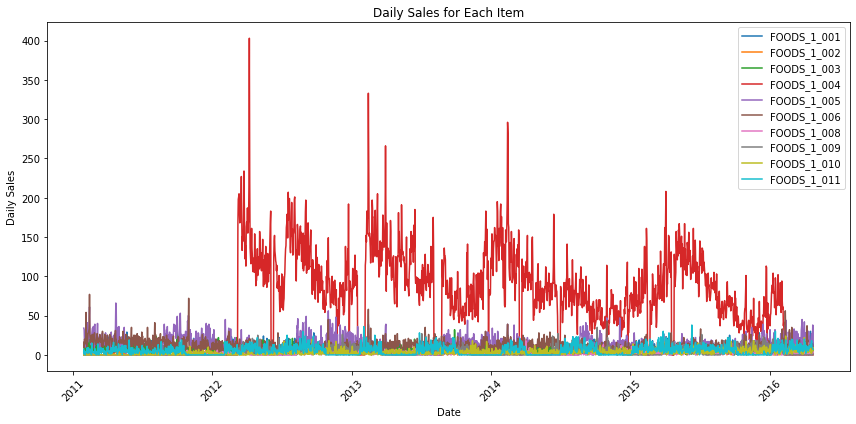

In [609]:
#plot sum of daily sales for each item combine in one figure

# Group by 'date' and 'item_id', then sum the 'sales' for each day-item combination
daily_sales = sales.groupby(['date', 'item_id'])['sales'].sum().reset_index()

# Plotting daily sales for each item
plt.figure(figsize=(12, 6))
for item in daily_sales['item_id'].unique():
    item_data = daily_sales[daily_sales['item_id'] == item]
    plt.plot(item_data['date'].values, item_data['sales'].values, label=item)
plt.xlabel('Date')
plt.ylabel('Daily Sales')
plt.title('Daily Sales for Each Item')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The food item 004 has a significantly higher number of sales compared to others, and its sales began in 2012.

#### Weekly Sales

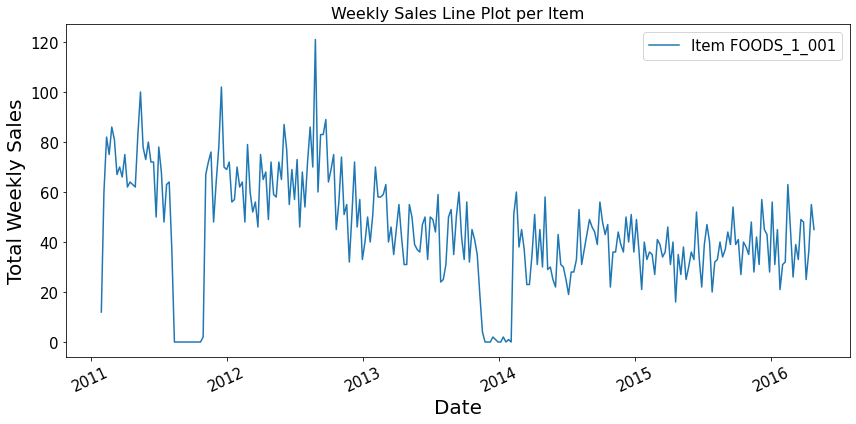

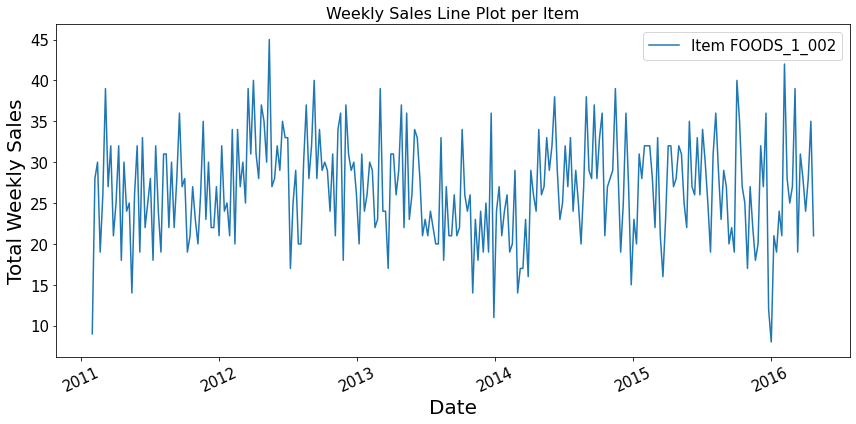

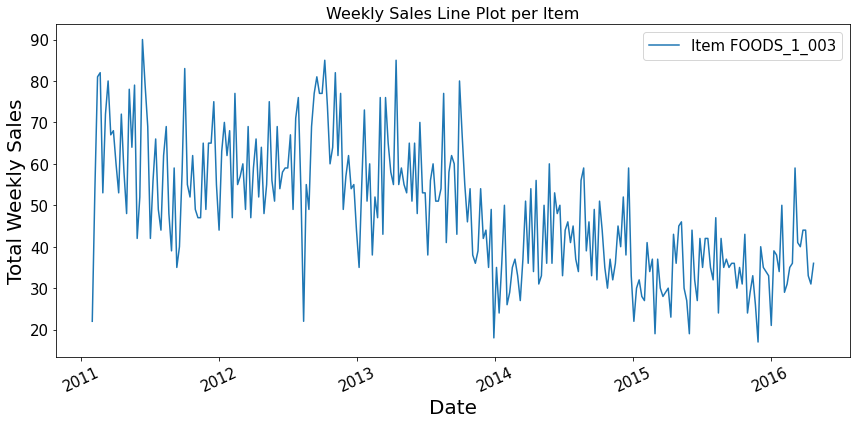

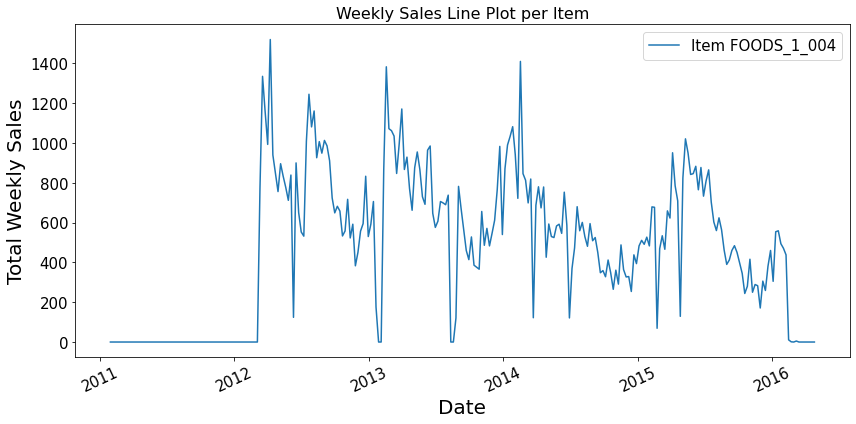

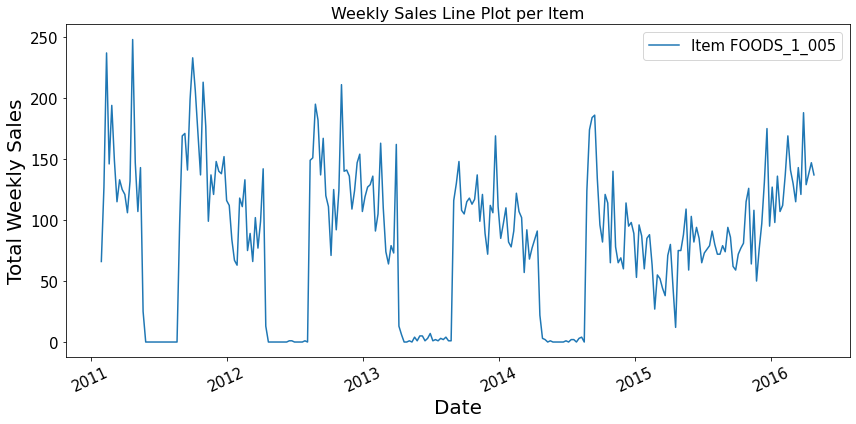

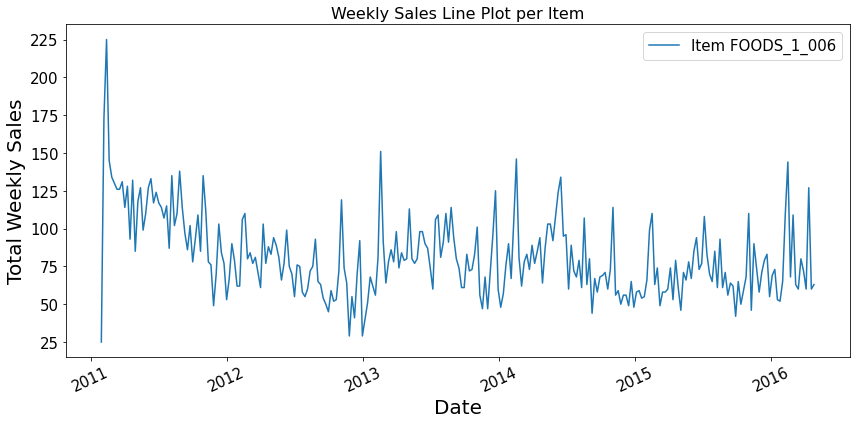

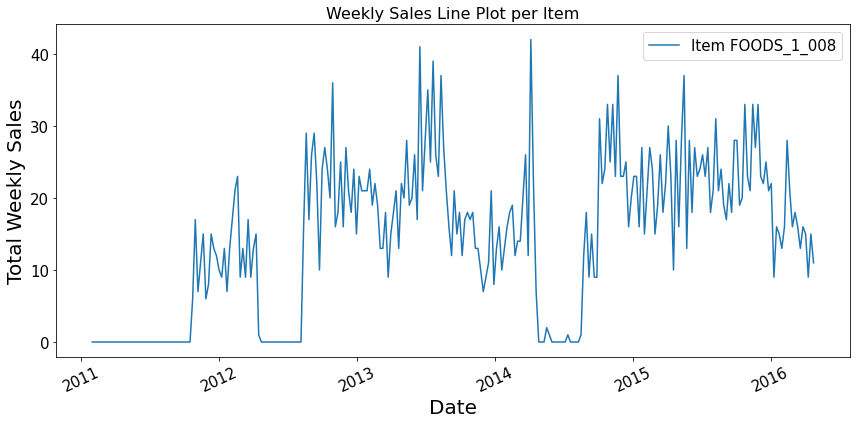

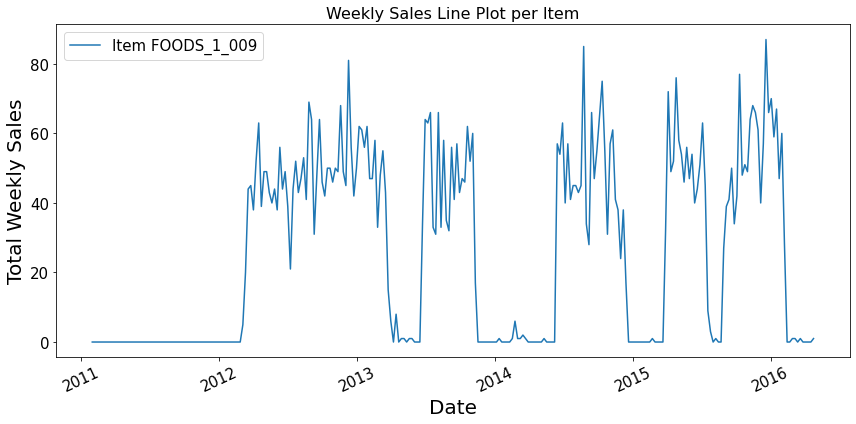

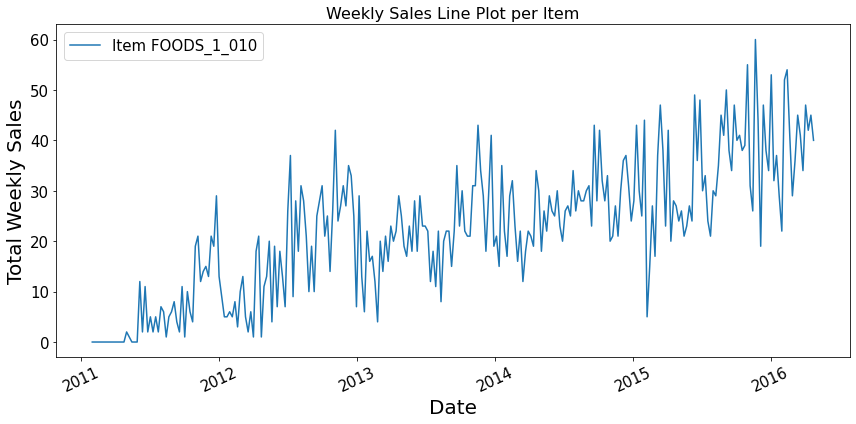

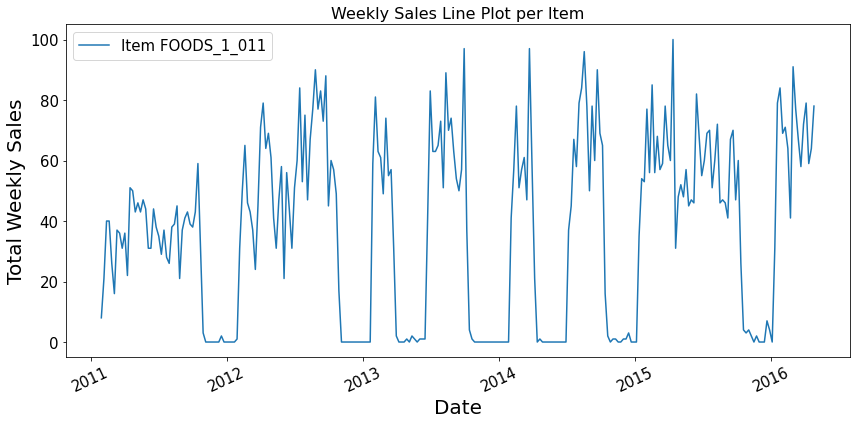

In [543]:
# Group by 'item_id' and resample weekly, then sum the 'sales' for each item and week
weekly_sales_per_item = sales.groupby(['item_id', pd.Grouper(key='date', freq='W')])['sales'].sum().reset_index()

# Plotting total weekly sales for each item using line plot

for item in weekly_sales_per_item['item_id'].unique():
    plt.figure(figsize=(12, 6))
    item_data = weekly_sales_per_item[weekly_sales_per_item['item_id'] == item]
    plt.plot(item_data.set_index('date')['sales'], label=f'Item {item}')
    plt.xlabel('Date', fontsize=20)
    plt.ylabel('Total Weekly Sales', fontsize=20)
    plt.xticks(fontsize=15, rotation=25)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=15)
    plt.title('Weekly Sales Line Plot per Item', fontsize=16)
    plt.tight_layout()
    plt.show()

#### Monthly Sales

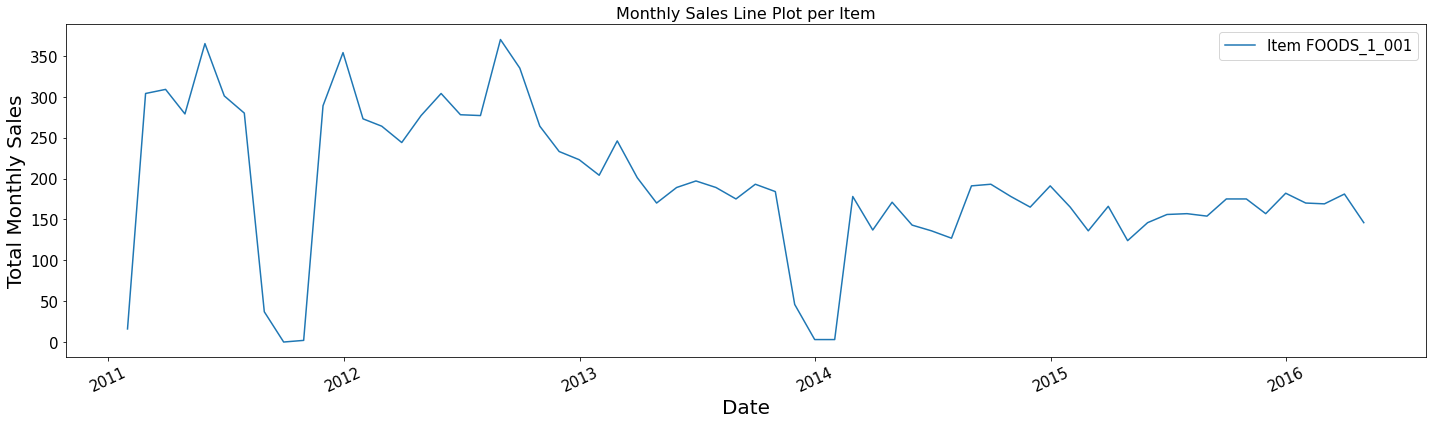

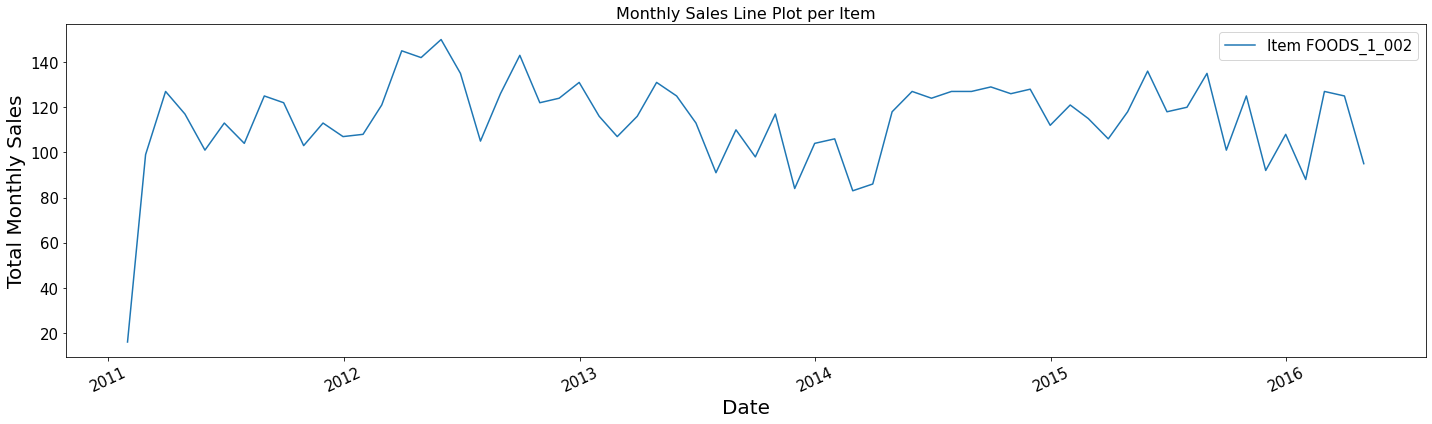

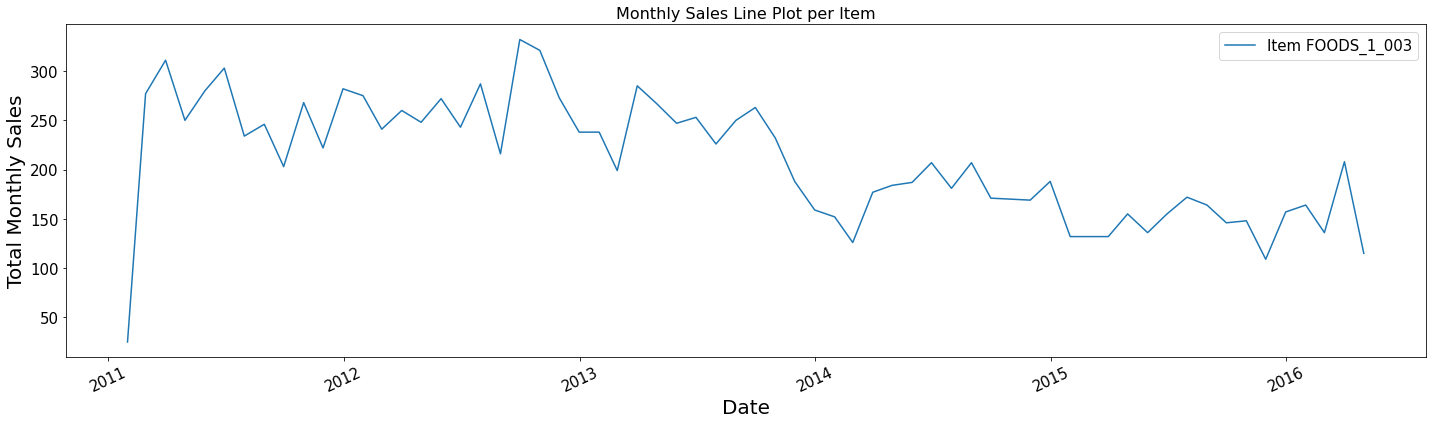

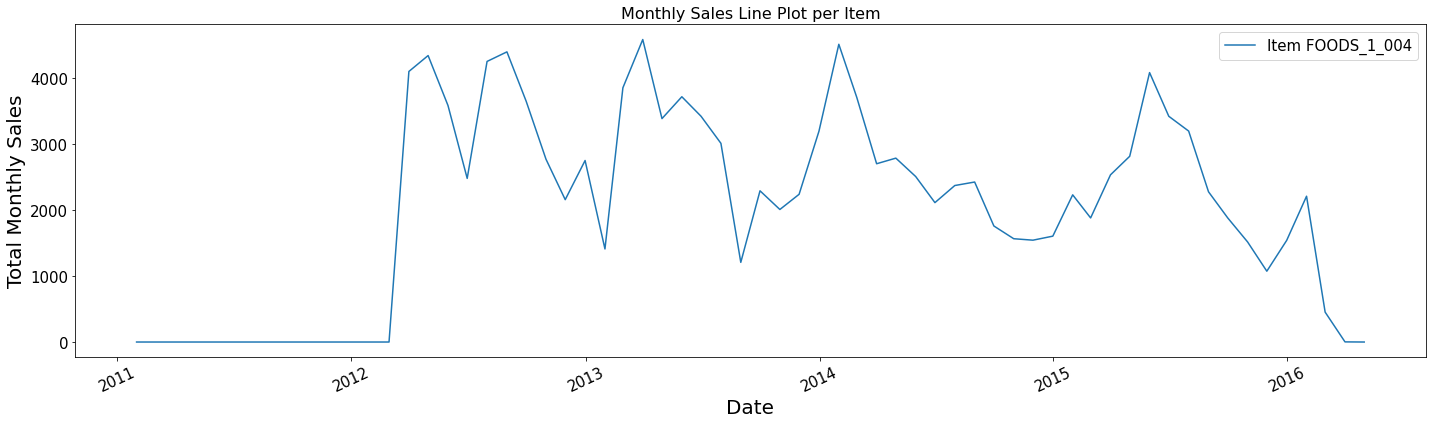

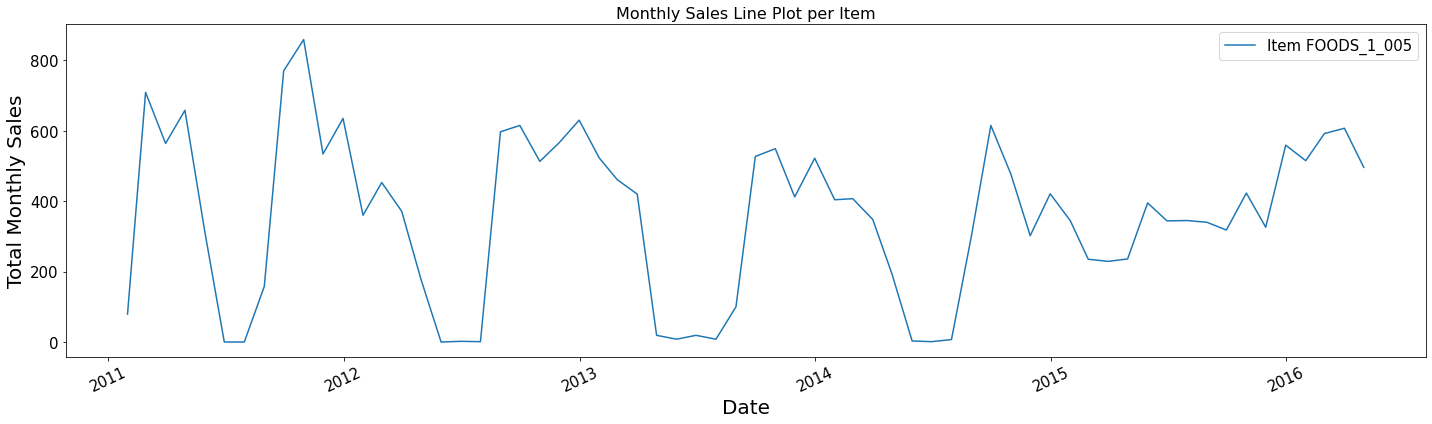

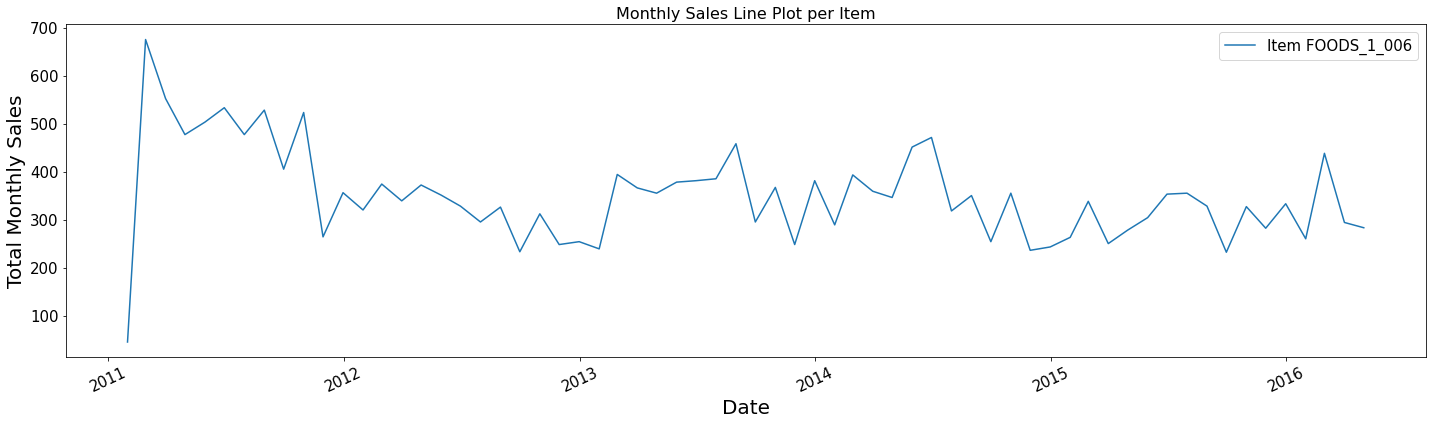

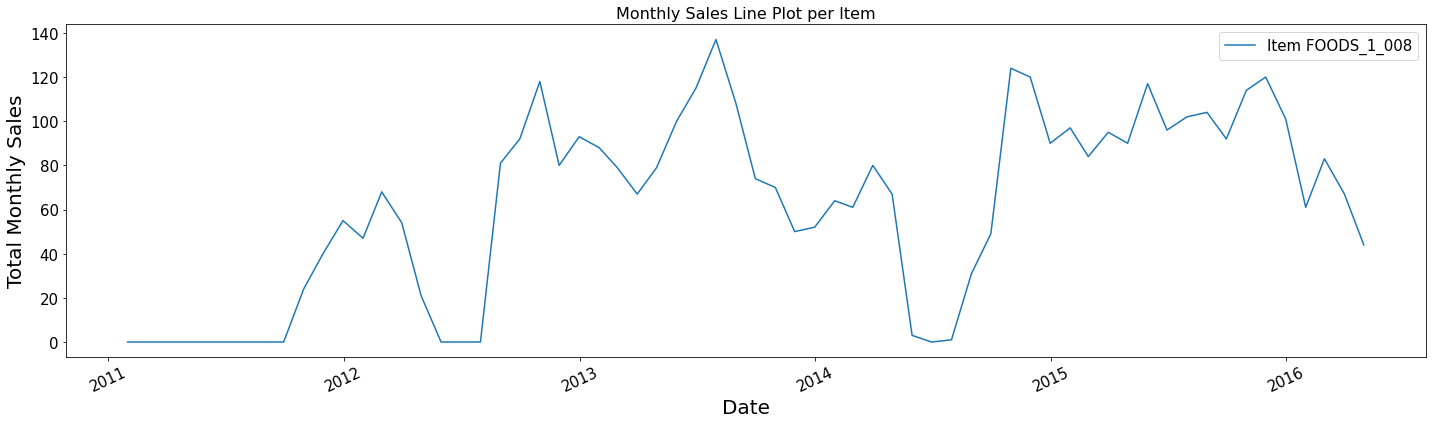

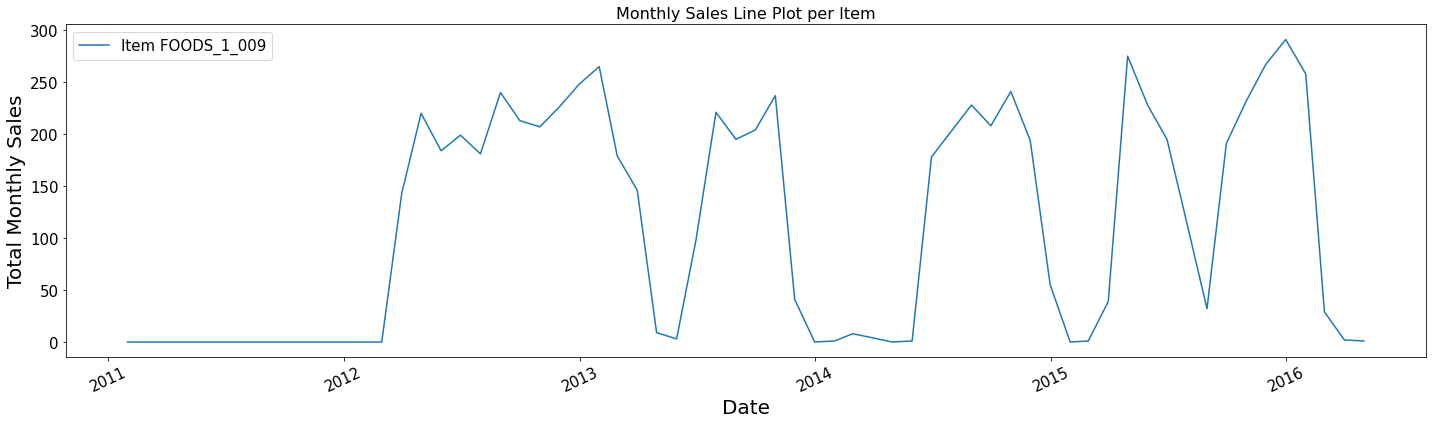

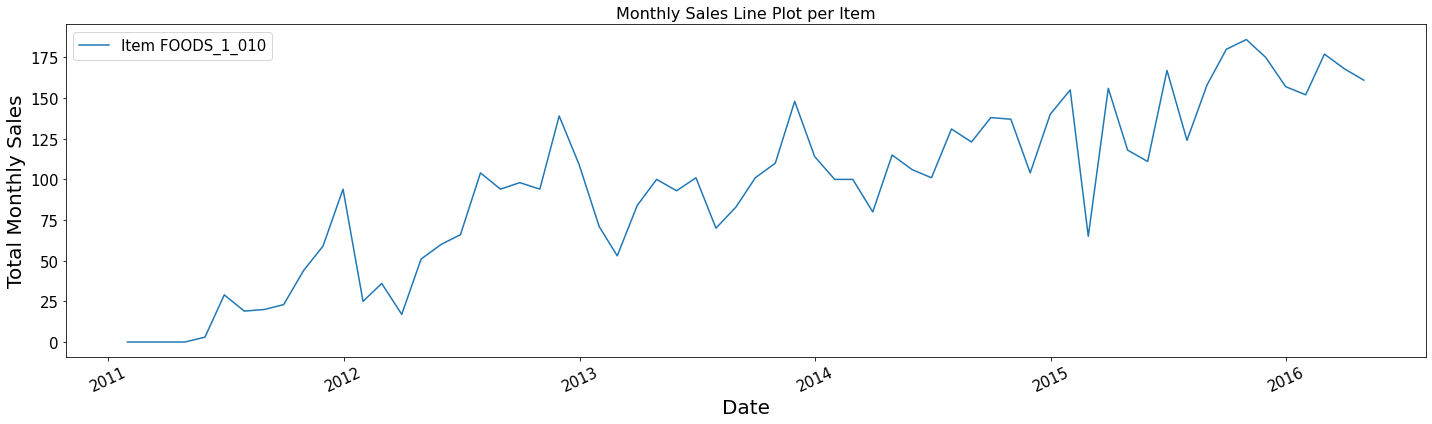

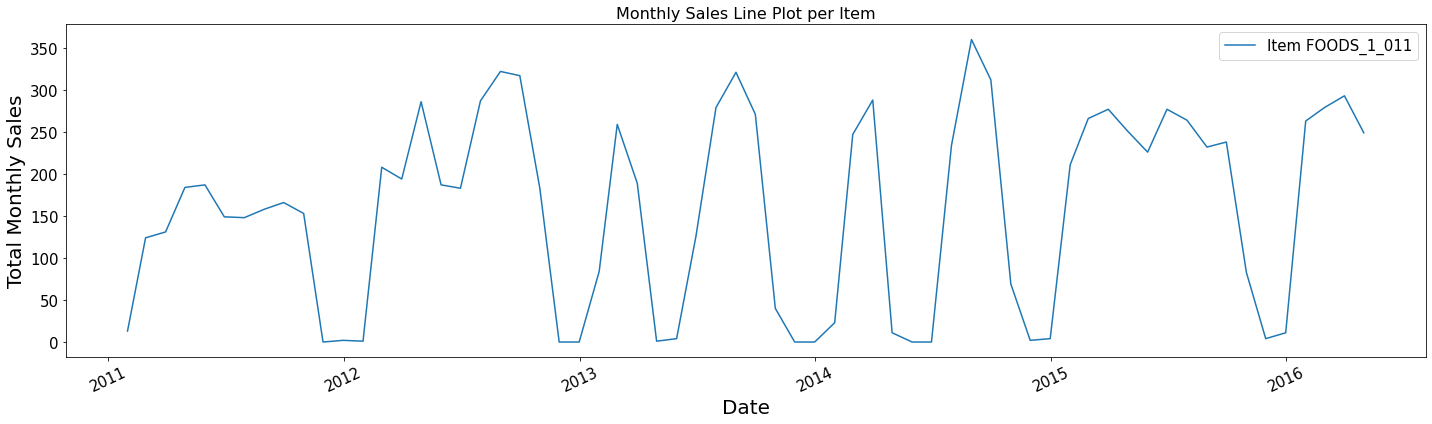

In [631]:
# Group by 'item_id' and resample monthly, then sum the 'sales' for each item and month
monthly_sales_per_item = sales.groupby(['item_id', pd.Grouper(key='date', freq='M')])['sales'].sum().reset_index()

#from matplotlib.dates import DateFormatter
# Plotting total monthly sales for each item using line plot

for item in monthly_sales_per_item['item_id'].unique():
    plt.figure(figsize=(20, 6))
    item_data = monthly_sales_per_item[monthly_sales_per_item['item_id'] == item]
    plt.plot(item_data.set_index('date')['sales'], label=f'Item {item}')
    plt.xlabel('Date', fontsize=20)
    plt.ylabel('Total Monthly Sales', fontsize=20)
    plt.xticks(fontsize=15, rotation=25)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=15)
    plt.title('Monthly Sales Line Plot per Item', fontsize=16)
    # Format x-axis labels to show month and year
   # date_format = DateFormatter('%b %Y')  # Month and year format
    #plt.gca().xaxis.set_major_formatter(date_format)
    plt.tight_layout()
    plt.show()

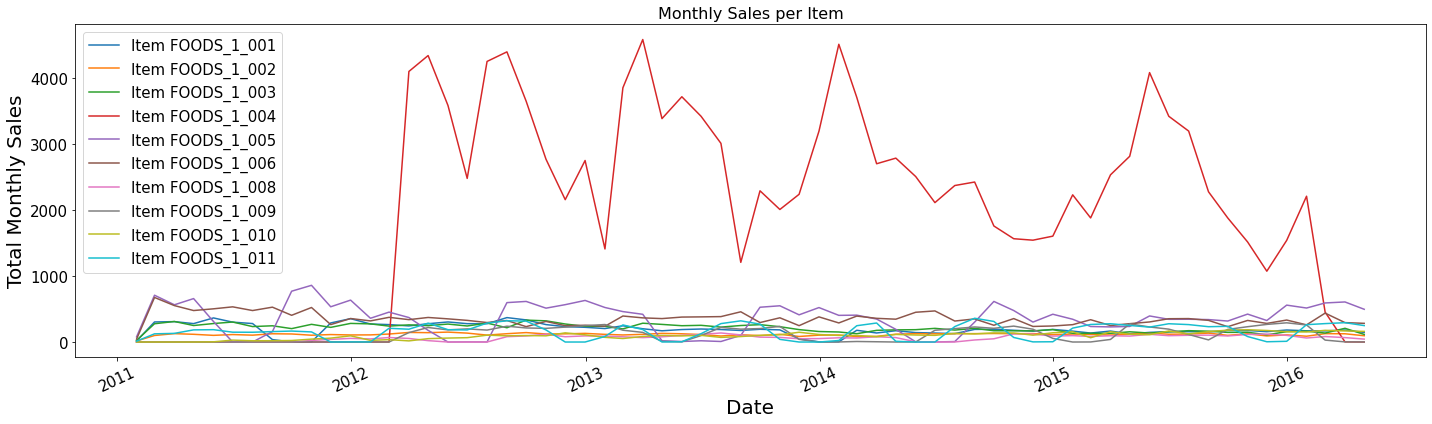

In [636]:
# Group by 'item_id' and resample monthly, then sum the 'sales' for each item and month
monthly_sales_per_item = sales.groupby(['item_id', pd.Grouper(key='date', freq='M')])['sales'].sum().reset_index()

# Plotting total monthly sales for each item using line plot
plt.figure(figsize=(20, 6))
for item in monthly_sales_per_item['item_id'].unique():
    item_data = monthly_sales_per_item[monthly_sales_per_item['item_id'] == item]
    plt.plot(item_data.set_index('date')['sales'], label=f'Item {item}')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Monthly Sales', fontsize=20)
plt.xticks(fontsize=15, rotation=25)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.title('Monthly Sales per Item', fontsize=16)
    # Format x-axis labels to show month and year
#date_format = DateFormatter('%b %Y')  # Month and year format
#plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.show()

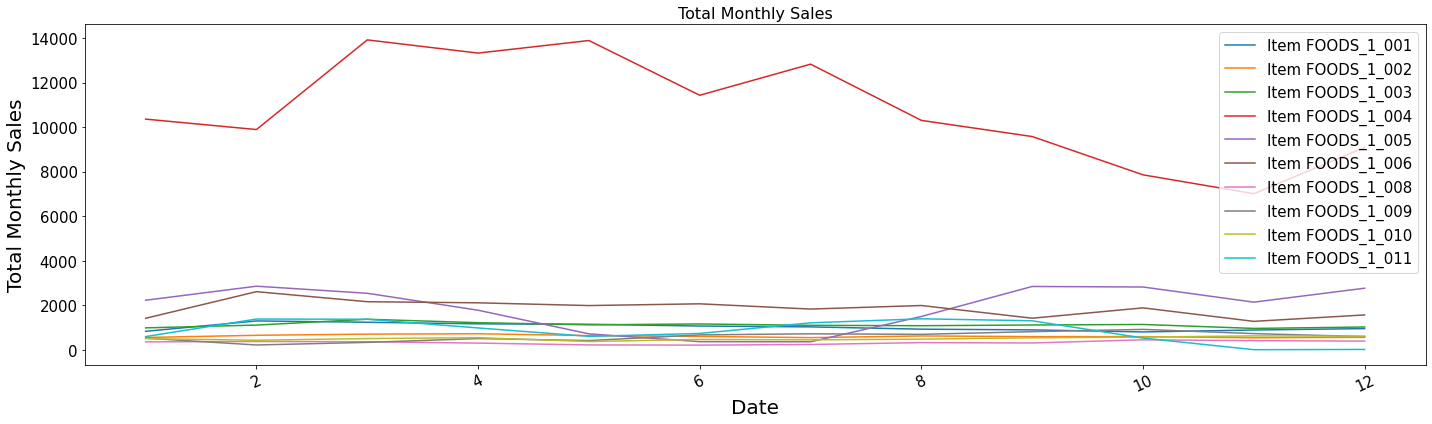

In [635]:
# Group by 'item_id' and 'month', then sum the 'sales' for each item and month for all years
monthly_sales_per_item = sales.groupby(['item_id', 'month'])['sales'].sum().reset_index()

# Plotting total monthly sales for each item using line plot
plt.figure(figsize=(20, 6))
for item in monthly_sales_per_item['item_id'].unique():
    item_data = monthly_sales_per_item[monthly_sales_per_item['item_id'] == item]
    plt.plot(item_data.set_index('month')['sales'], label=f'Item {item}')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Monthly Sales', fontsize=20)
plt.xticks(fontsize=15, rotation=25)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.title('Total Monthly Sales', fontsize=16)
    # Format x-axis labels to show month and year
#date_format = DateFormatter('%b %Y')  # Month and year format
#plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.show()

The analysis of monthly sales over multiple years reveals fluctuations in sales volumes without a consistent seasonal pattern, indicating variable sales trends throughout the year across the items.

#### Check how events and SNAP affect sales

#### Event vs None-Event Sales

In [659]:
#add a column named 'event to the data with 1 for an event and 0 for no event
sales['event']= np.where(sales['event_type_1'] !='None', 1,
                         np.where(sales['event_type_2'] !='None', 1,
                                 0))

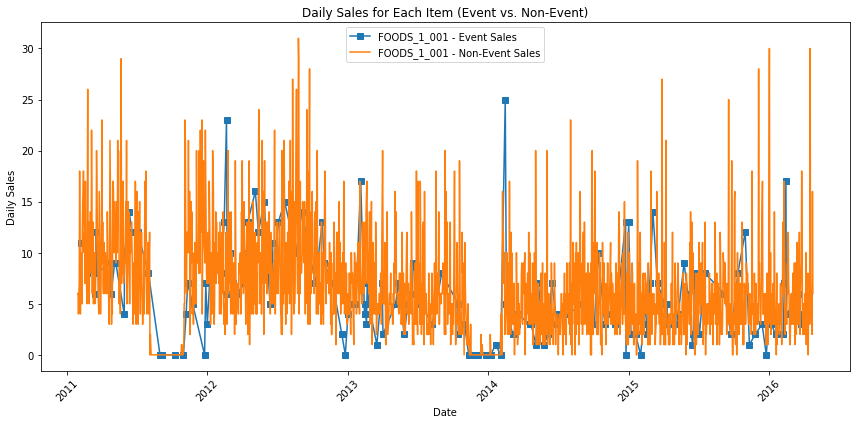

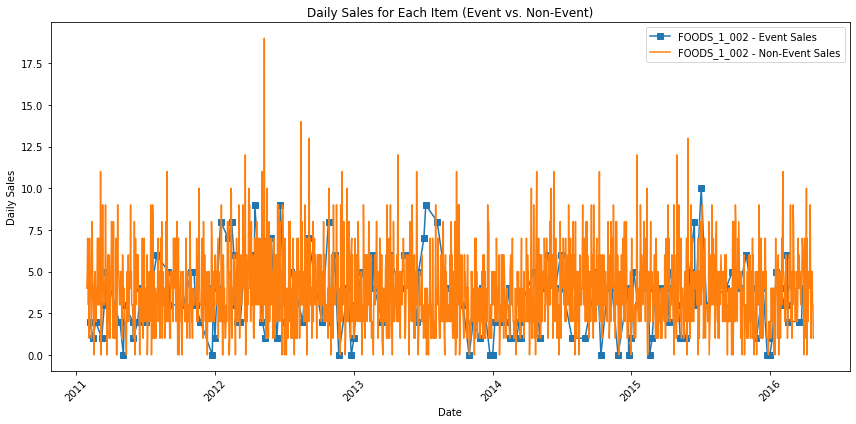

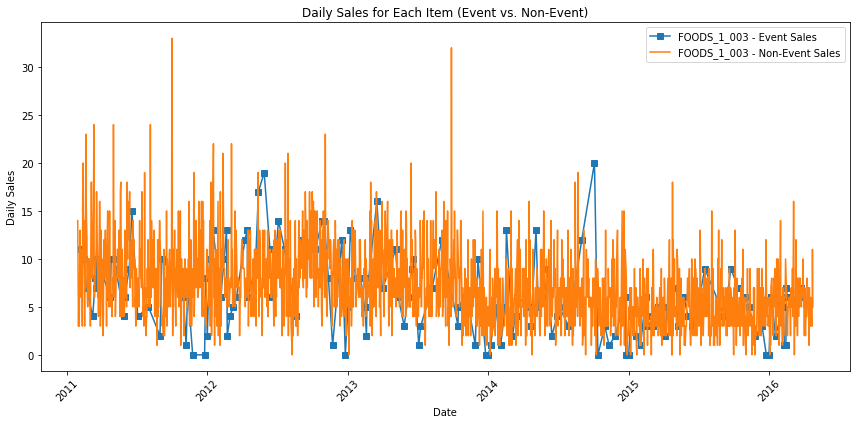

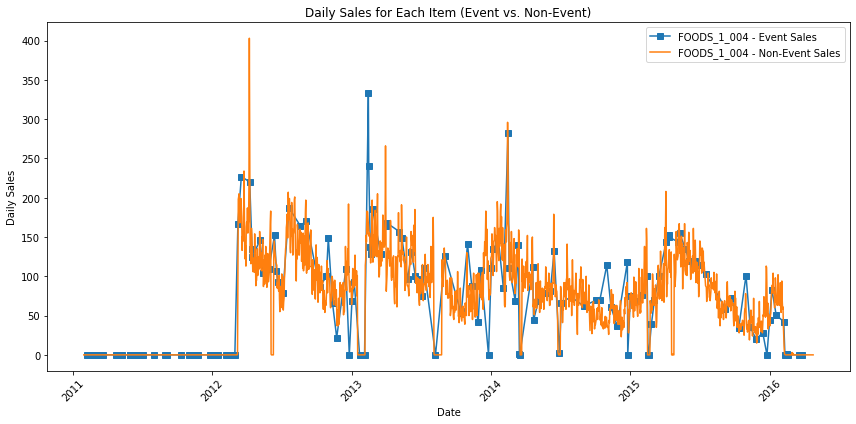

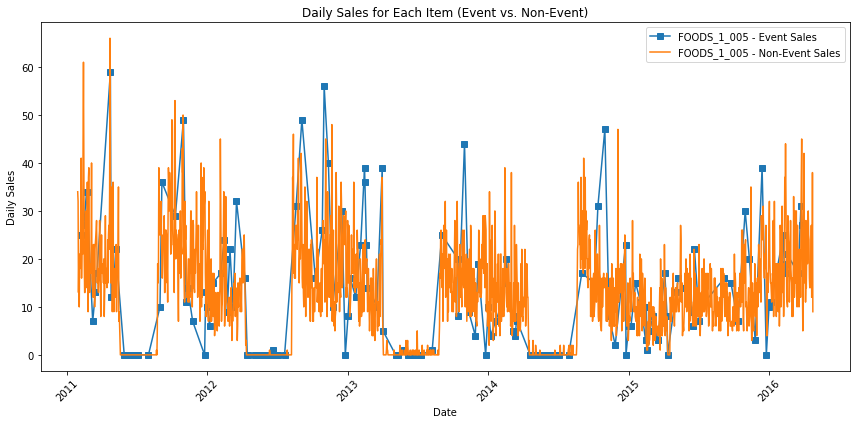

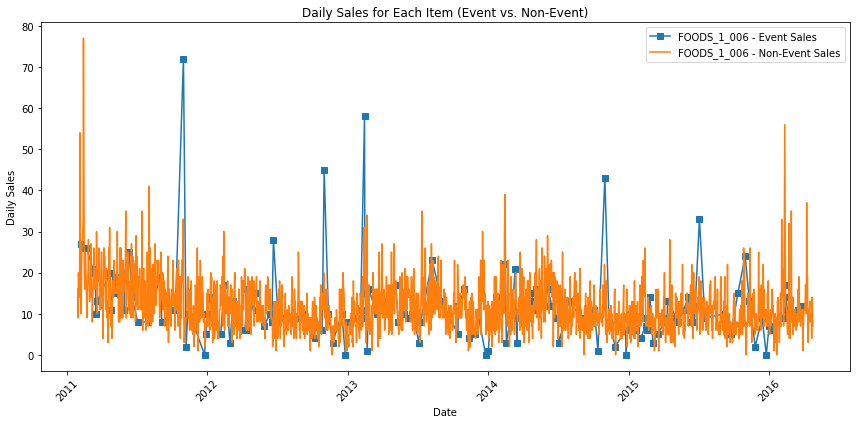

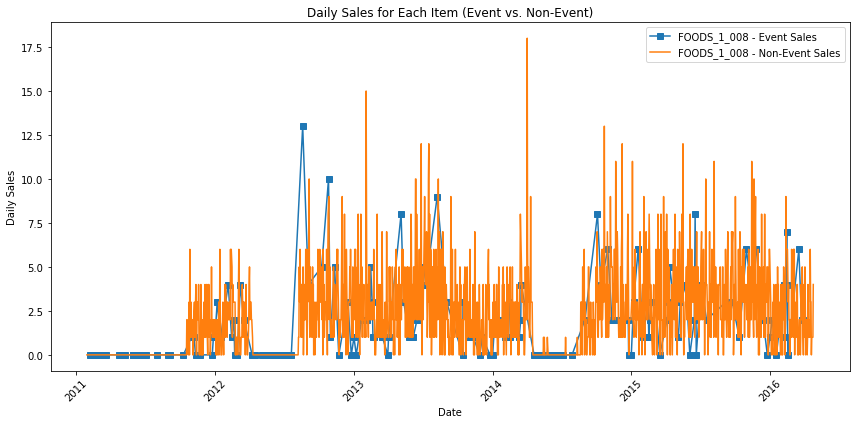

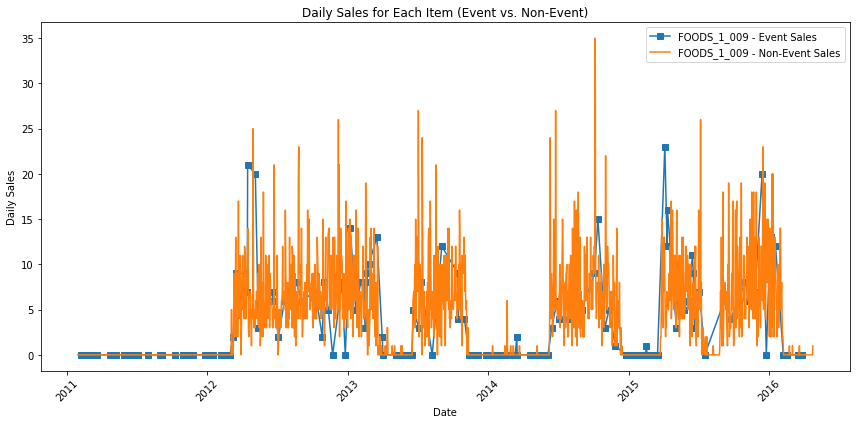

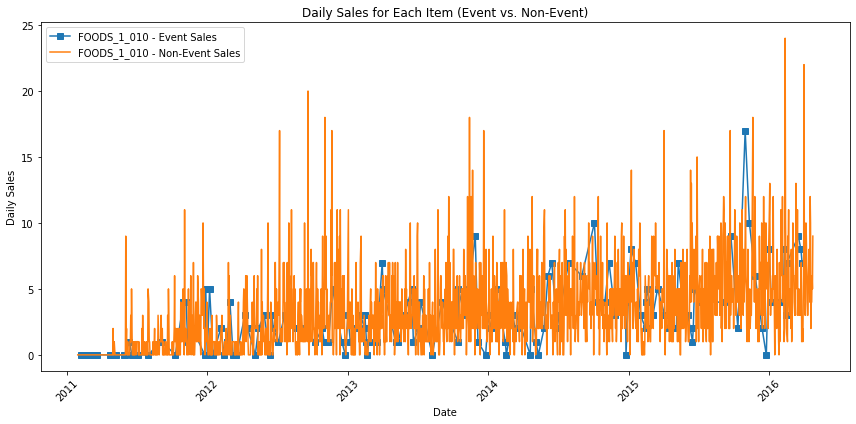

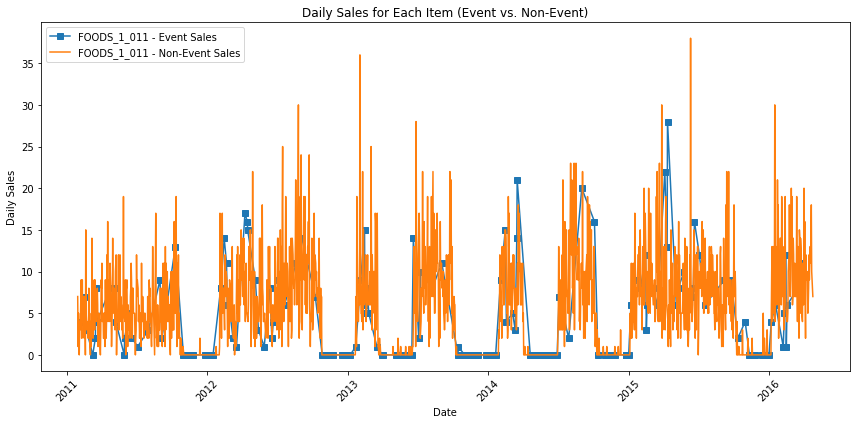

In [677]:
# Filter sales data for event and non-event days
event_sales = sales[sales['event'] == 1]
non_event_sales = sales[sales['event'] == 0]

# Group by 'date' and 'item_id', then sum the 'sales' for each day-item combination for event and non-event sales
daily_sales_event = event_sales.groupby(['date', 'item_id'])['sales'].sum().reset_index()
daily_sales_noevent = non_event_sales.groupby(['date', 'item_id'])['sales'].sum().reset_index()

# Get unique item IDs
unique_items = daily_sales_event['item_id'].unique()

# Plotting daily sales for each item with event and non-event sales in the same plot


for item in unique_items:
    plt.figure(figsize=(12, 6))
    item_data_event = daily_sales_event[daily_sales_event['item_id'] == item]
    item_data_noevent = daily_sales_noevent[daily_sales_noevent['item_id'] == item]
    
    # Plot event sales
    plt.plot(item_data_event['date'].values, item_data_event['sales'].values, label=f'{item} - Event Sales',marker='s')
    
    # Plot non-event sales
    plt.plot(item_data_noevent['date'].values, item_data_noevent['sales'].values, label=f'{item} - Non-Event Sales')
    
    plt.xlabel('Date')
    plt.ylabel('Daily Sales')
    plt.title('Daily Sales for Each Item (Event vs. Non-Event)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

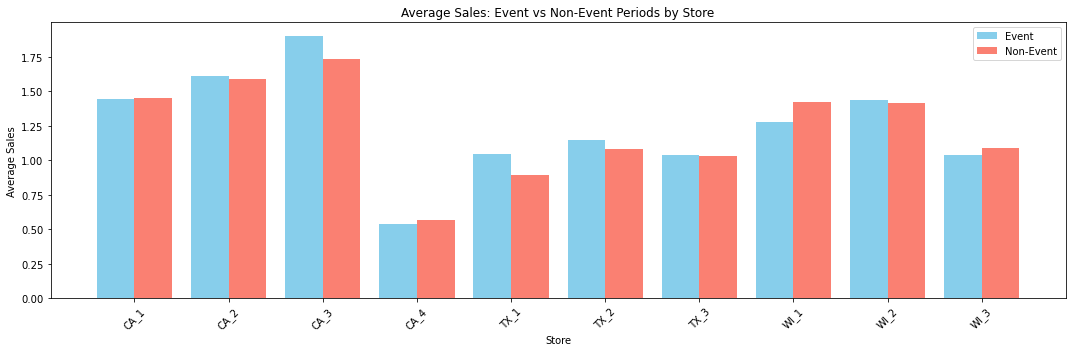

In [718]:
# Filter sales data for event and non-event days
event_sales = sales[sales['event'] == 1]
non_event_sales = sales[sales['event'] == 0]

# Group by 'store_id', then sum the 'sales' for each store combination for event and non-event sales
Avg_salesperyear_event = event_sales.groupby('store_id')['sales'].mean()
Avg_salesperyear_noevent = non_event_sales.groupby('store_id')['sales'].mean()

# Plotting bar chart for average sales during event and non-event periods for each store
plt.figure(figsize=(15, 5))
x=np.arange(len(Avg_salesperyear_event.index))
plt.bar(x, Avg_salesperyear_event.values, 0.4,label='Event', color='skyblue')
plt.bar(x+0.4, Avg_salesperyear_noevent.values, 0.4,label='Non-Event', color='salmon')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.title('Average Sales: Event vs Non-Event Periods by Store')
plt.legend()
plt.xticks(x+0.2,Avg_salesperyear_event.index,rotation=45)
plt.tight_layout()
plt.show()

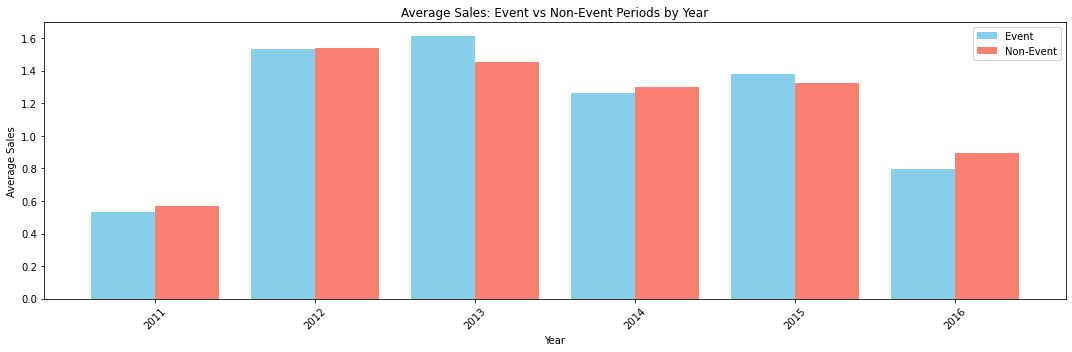

In [719]:
# Filter sales data for event and non-event days
event_sales = sales[sales['event'] == 1]
non_event_sales = sales[sales['event'] == 0]

# Group by 'year' , then sum the 'sales' for each year combination for event and non-event sales
Avg_salesperyear_event = event_sales.groupby('year')['sales'].mean()
Avg_salesperyear_noevent = non_event_sales.groupby('year')['sales'].mean()

# Plotting bar chart for average sales during event and non-event periods for each year
plt.figure(figsize=(15, 5))
x=np.arange(len(Avg_salesperyear_event.index))
plt.bar(x, Avg_salesperyear_event.values, 0.4,label='Event', color='skyblue')
plt.bar(x+0.4, Avg_salesperyear_noevent.values, 0.4,label='Non-Event', color='salmon')
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.title('Average Sales: Event vs Non-Event Periods by Year')
plt.legend()
plt.xticks(x+0.2,Avg_salesperyear_event.index,rotation=45)
plt.tight_layout()
plt.show()

The analysis of average sales during event and non-event periods reveals that there is no consistent or significant difference in average sales when an event occurs. 

In certain years/stores, the average sales during events are higher, while in other years, the average sales during non-event periods show a higher value. 

This indicates that the presence or absence of events does not consistently impact average sales, and other factors may influence sales fluctuations throughout different years.

#### SNAP vs Non-SNAP Periods

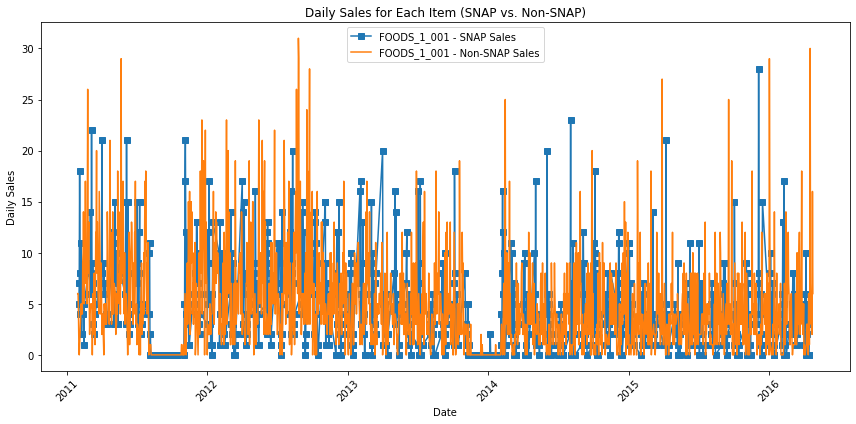

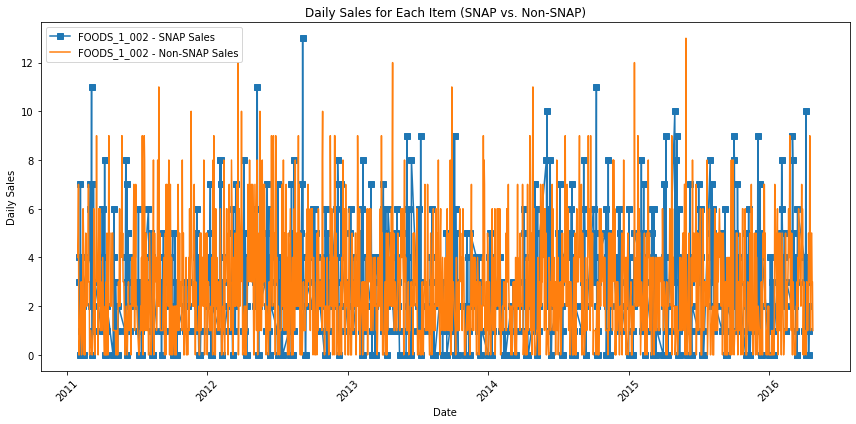

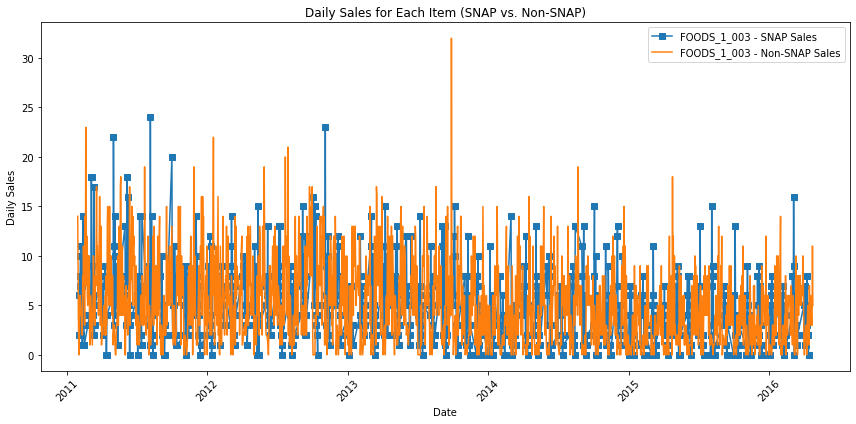

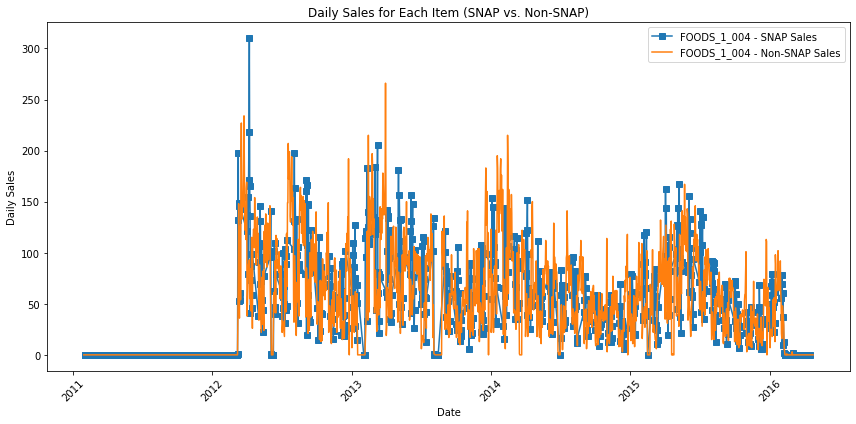

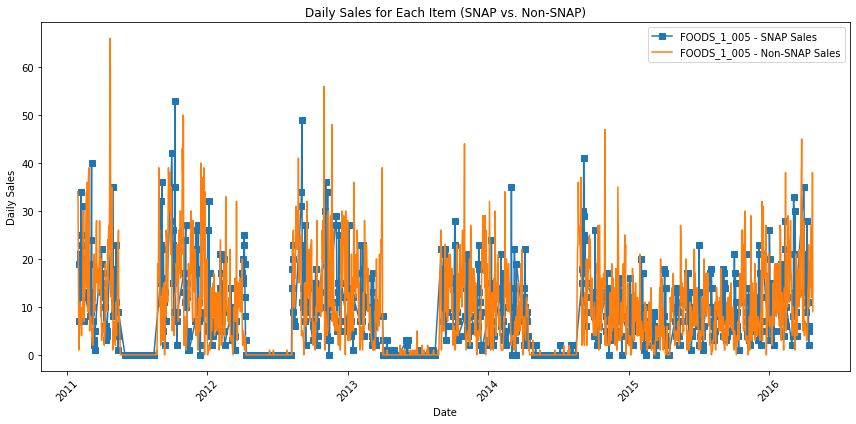

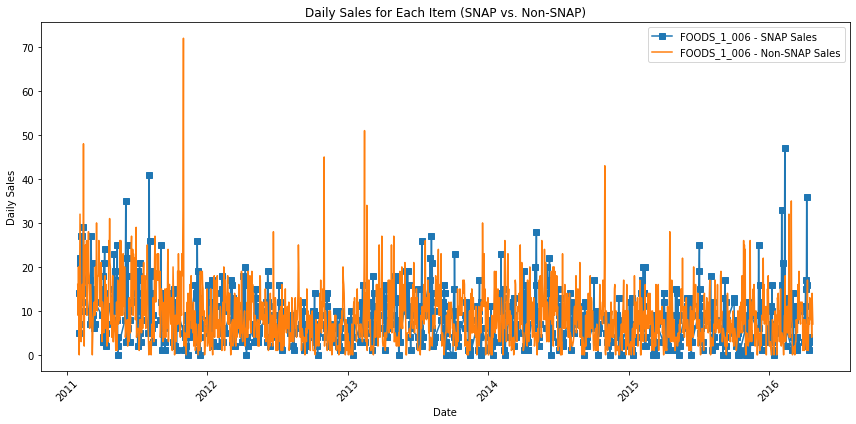

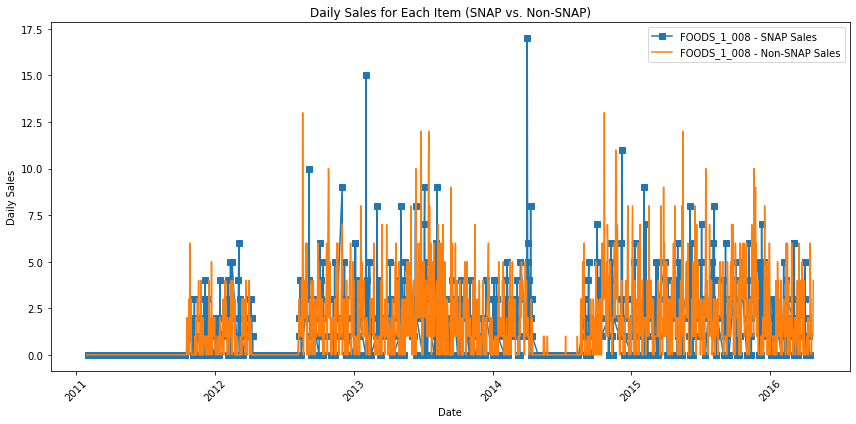

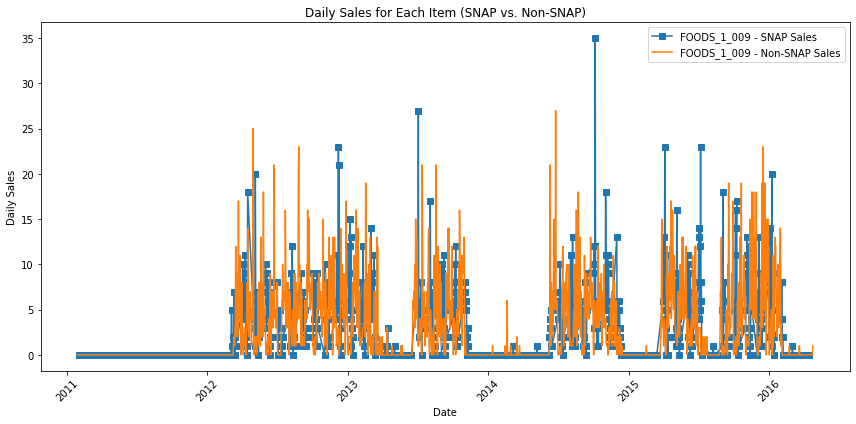

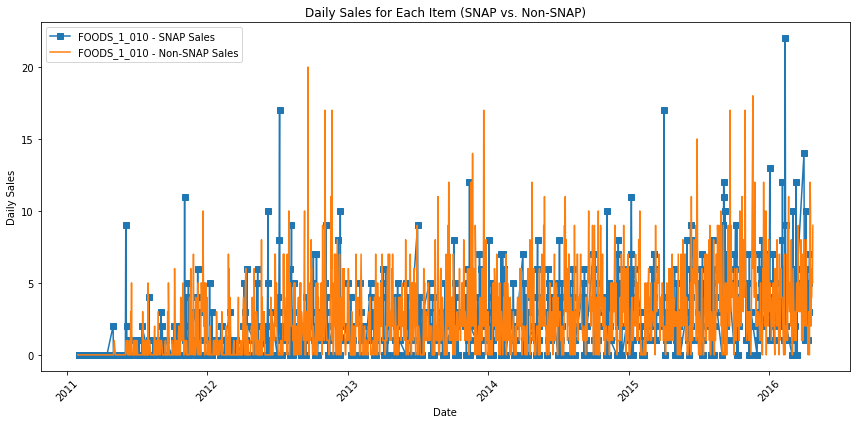

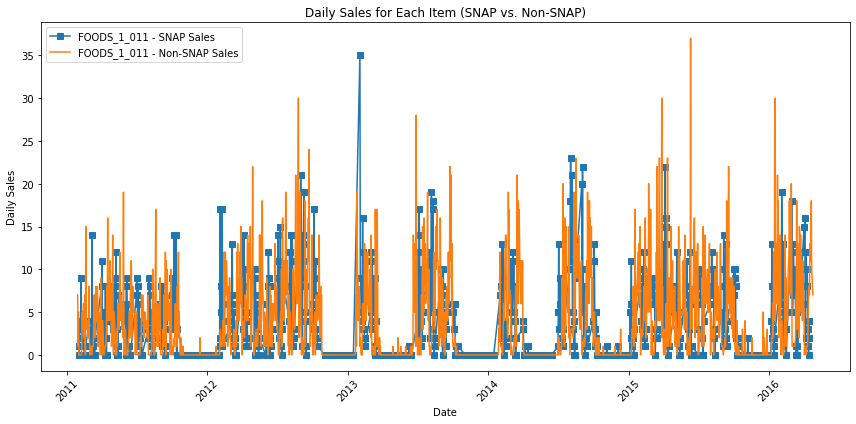

In [712]:
# Filter sales data for snap and non-snap days
snap_sales = sales[sales['snap'] == 1]
non_snap_sales = sales[sales['snap'] == 0]

# Group by 'date' and 'item_id', then sum the 'sales' for each day-item combination for snap and non-snap sales
daily_sales_snap = snap_sales.groupby(['date', 'item_id'])['sales'].sum().reset_index()
daily_sales_nosnap = non_snap_sales.groupby(['date', 'item_id'])['sales'].sum().reset_index()

# Get unique item IDs
unique_items = daily_sales_snap['item_id'].unique()

# Plotting daily sales for each item with snap and non-snap sales in the same plot


for item in unique_items:
    plt.figure(figsize=(12, 6))
    item_data_snap = daily_sales_snap[daily_sales_snap['item_id'] == item]
    item_data_nosnap = daily_sales_nosnap[daily_sales_nosnap['item_id'] == item]
    
    # Plot event sales
    plt.plot(item_data_snap['date'].values, item_data_snap['sales'].values, label=f'{item} - SNAP Sales',marker='s')
    
    # Plot non-event sales
    plt.plot(item_data_nosnap['date'].values, item_data_nosnap['sales'].values, label=f'{item} - Non-SNAP Sales')
    
    plt.xlabel('Date')
    plt.ylabel('Daily Sales')
    plt.title('Daily Sales for Each Item (SNAP vs. Non-SNAP)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

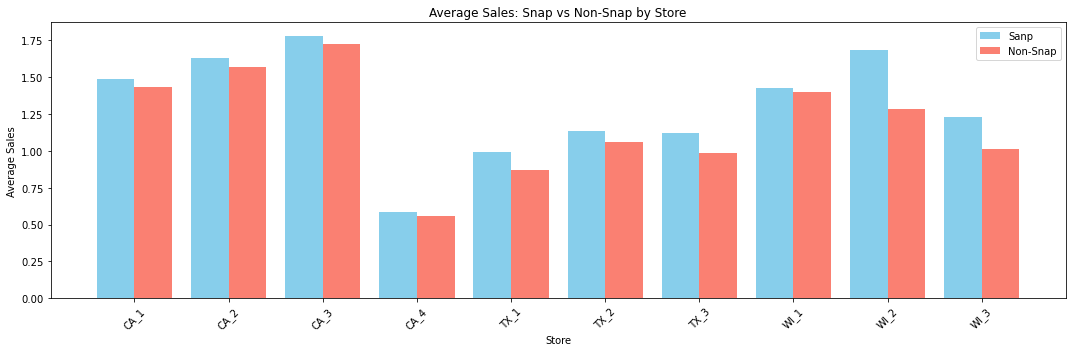

In [720]:
# Filter sales data for event and non-event days
snap_sales = sales[sales['snap'] == 1]
non_snap_sales = sales[sales['snap'] == 0]

# Group by 'store_id', then sum the 'sales' for each store combination for snap and non-snap sales
Avg_salesperyear_snap = snap_sales.groupby('store_id')['sales'].mean()
Avg_salesperyear_nosnap = non_snap_sales.groupby('store_id')['sales'].mean()

# Plotting bar chart for average sales during snap and non-snap periods for each store
plt.figure(figsize=(15, 5))
x=np.arange(len(Avg_salesperyear_snap.index))
plt.bar(x, Avg_salesperyear_snap.values, 0.4,label='Sanp', color='skyblue')
plt.bar(x+0.4, Avg_salesperyear_nosnap.values, 0.4,label='Non-Snap', color='salmon')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.title('Average Sales: Snap vs Non-Snap by Store')
plt.legend()
plt.xticks(x+0.2,Avg_salesperyear_snap.index,rotation=45)
plt.tight_layout()
plt.show()

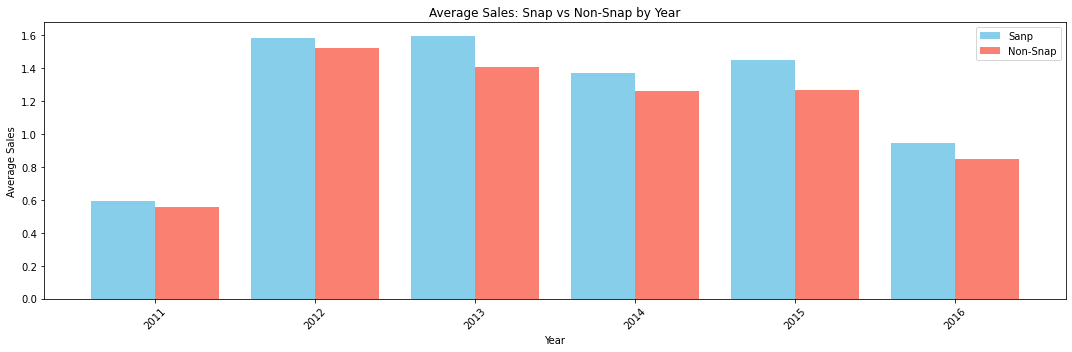

In [721]:
# Filter sales data for event and non-event days
snap_sales = sales[sales['snap'] == 1]
non_snap_sales = sales[sales['snap'] == 0]

# Group by 'year', then sum the 'sales' for each year combination for snap and non-snap sales
Avg_salesperyear_snap = snap_sales.groupby('year')['sales'].mean()
Avg_salesperyear_nosnap = non_snap_sales.groupby('year')['sales'].mean()

# Plotting bar chart for average sales during snap and non-snap periods for each year
plt.figure(figsize=(15, 5))
x=np.arange(len(Avg_salesperyear_snap.index))
plt.bar(x, Avg_salesperyear_snap.values, 0.4,label='Sanp', color='skyblue')
plt.bar(x+0.4, Avg_salesperyear_nosnap.values, 0.4,label='Non-Snap', color='salmon')
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.title('Average Sales: Snap vs Non-Snap by Year')
plt.legend()
plt.xticks(x+0.2,Avg_salesperyear_snap.index,rotation=45)
plt.tight_layout()
plt.show()

The impact of allowing SNAP purchases on given dates is notably significant. Across all years/stores, the average sales when SNAP purchases are allowed in stores are consistently higher compared to the average sales when SNAP purchases are not allowed. This indicates a clear correlation between SNAP availability and increased sales volume, highlighting the importance of SNAP policies in number of sales.

#### Explore total number of sales per item per year, store, and state

#### Sales by year

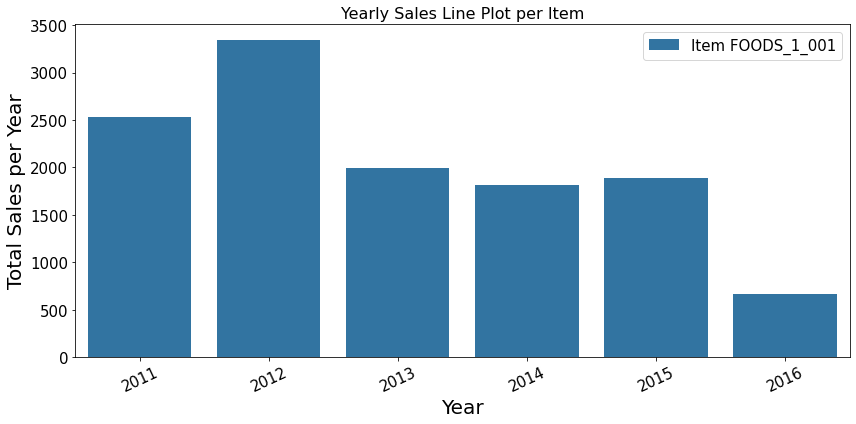

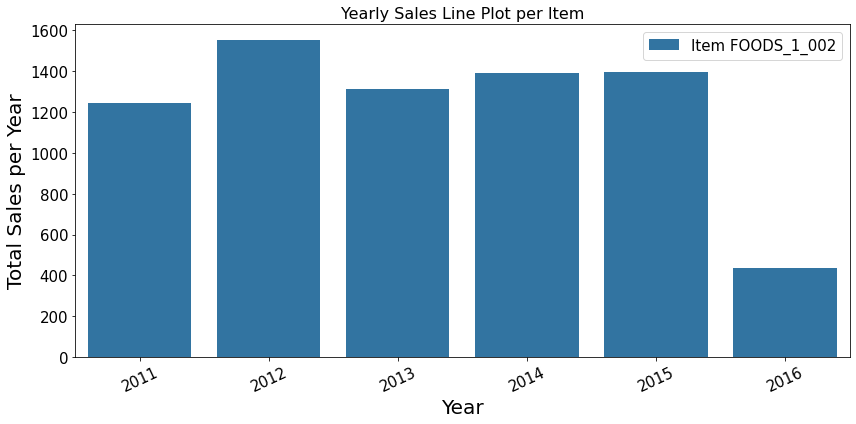

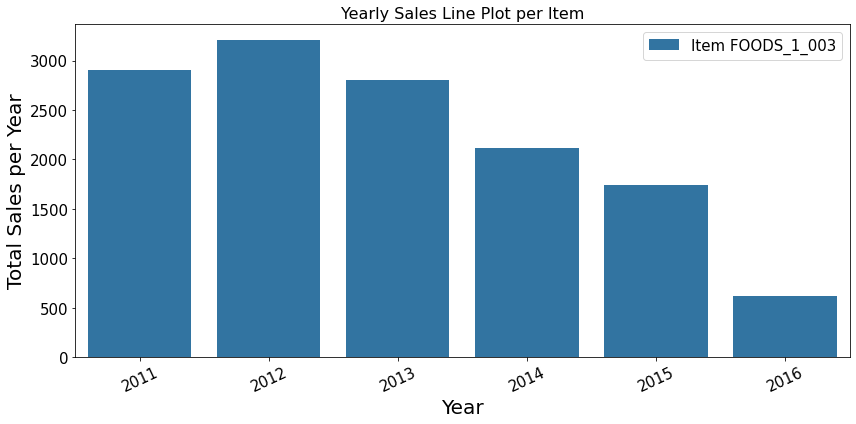

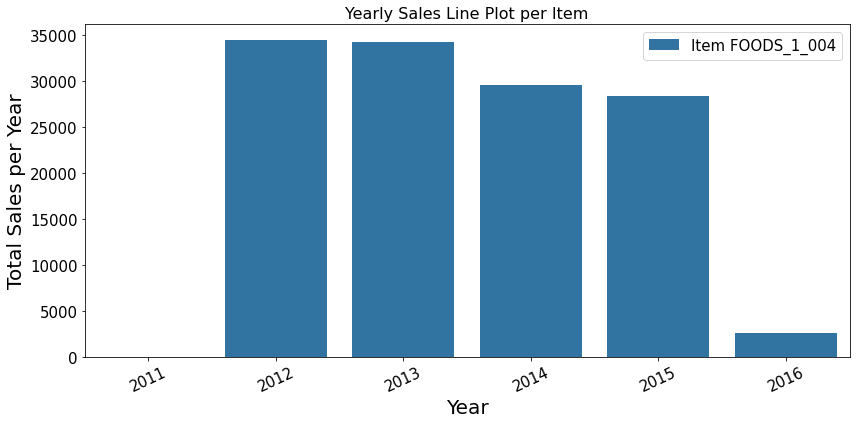

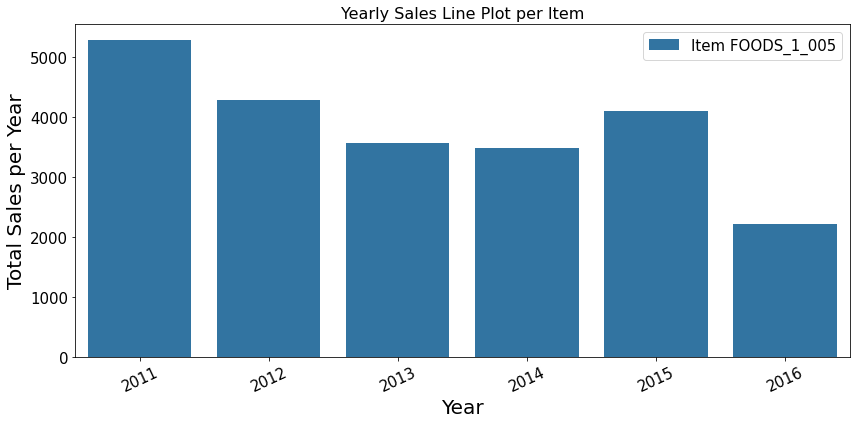

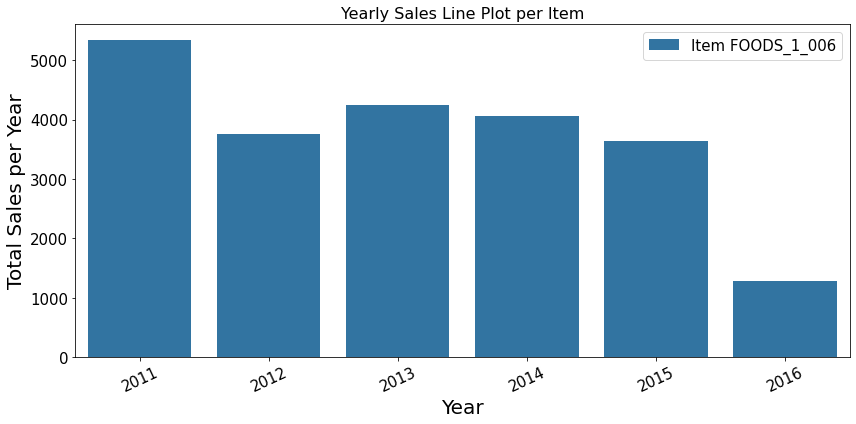

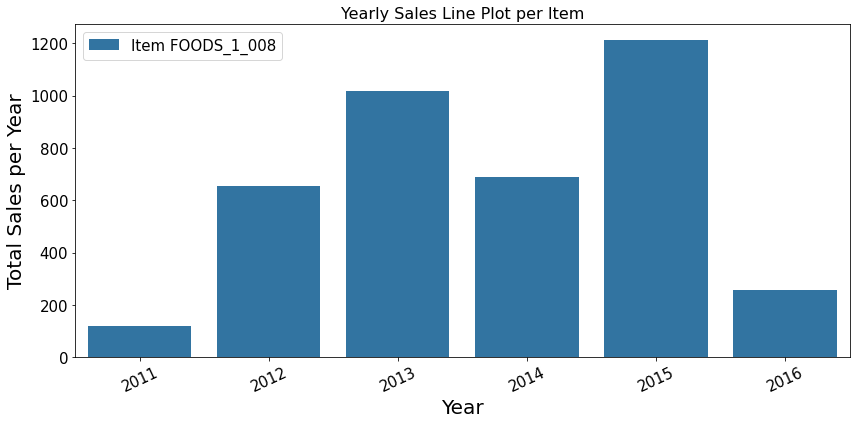

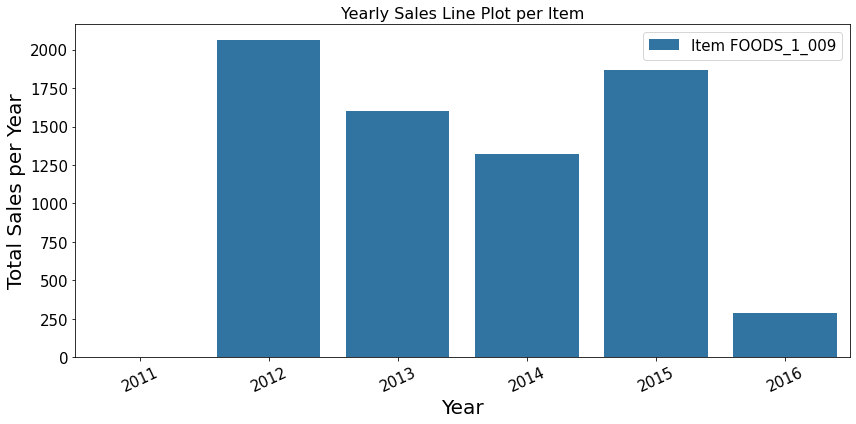

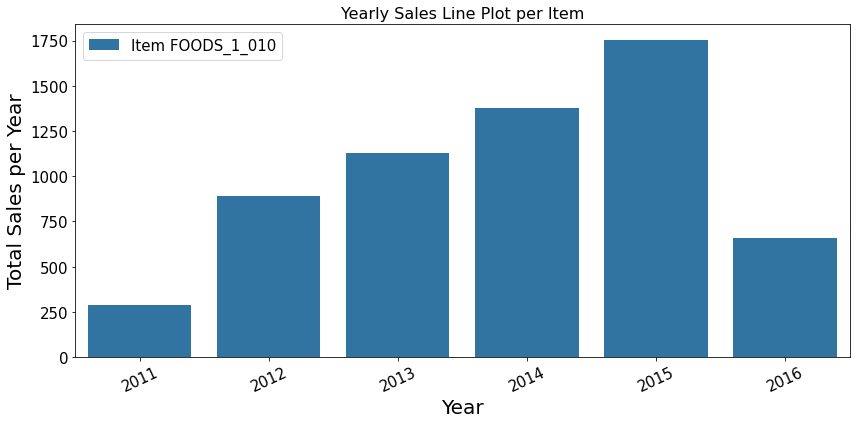

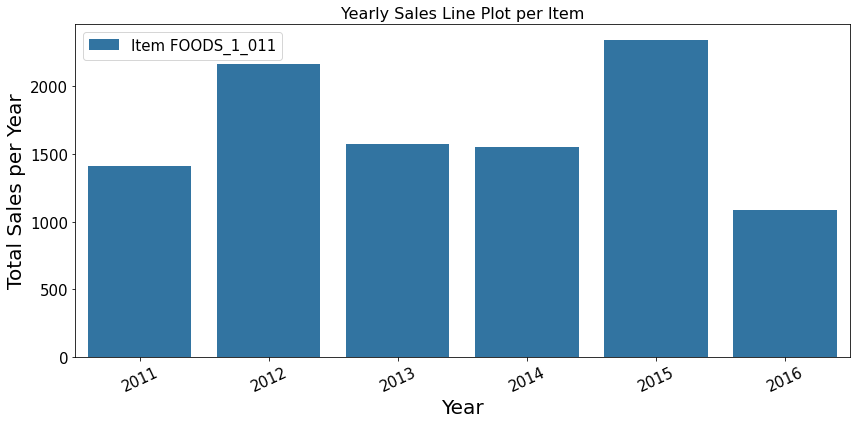

In [552]:
# Group by 'item_id' and resample yearly, then sum the 'sales' for each item and year
yearly_sales_per_item = sales.groupby(['item_id', 'year'])['sales'].sum().reset_index()

# Plotting total yearly sales for each item using line plot
for item in yearly_sales_per_item['item_id'].unique():
    plt.figure(figsize=(12, 6))
    item_data = yearly_sales_per_item[yearly_sales_per_item['item_id'] == item]
    sns.barplot(x='year',y='sales',data=item_data,label=f'Item {item}')
    plt.xlabel('Year', fontsize=20)
    plt.ylabel('Total Sales per Year', fontsize=20)
    plt.xticks(fontsize=15, rotation=25)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=15)
    plt.title('Yearly Sales Line Plot per Item', fontsize=16)
    plt.tight_layout()
    plt.show()

In general, the years 2012 and 2015 have higher sales numbers for most items.

#### Sales by year for each store per item

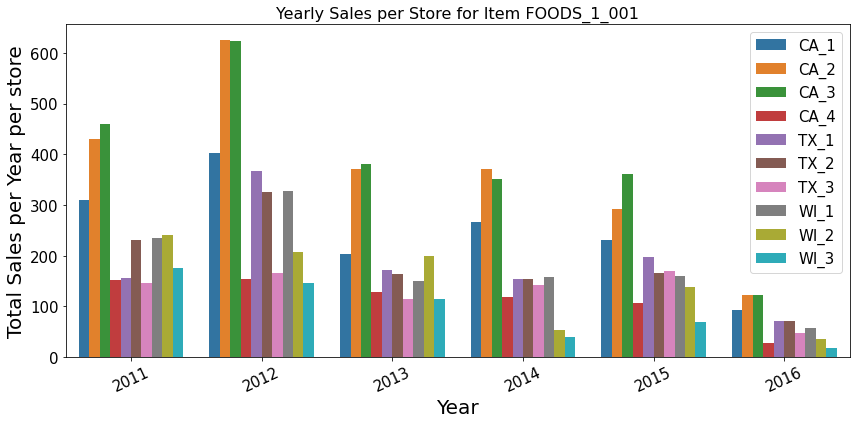

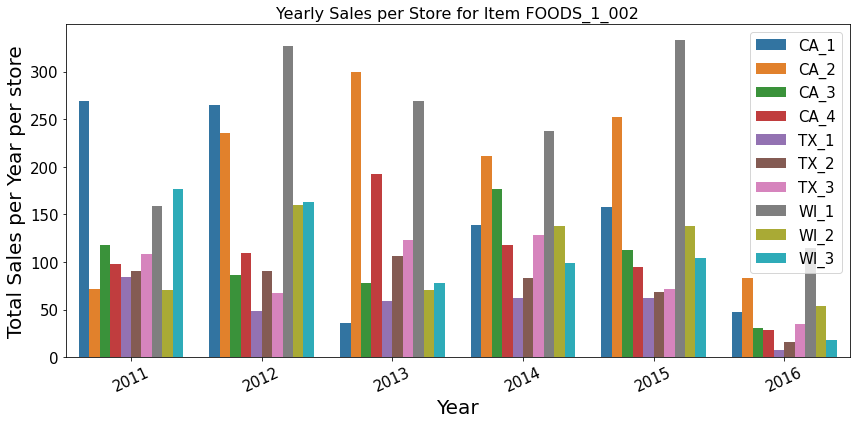

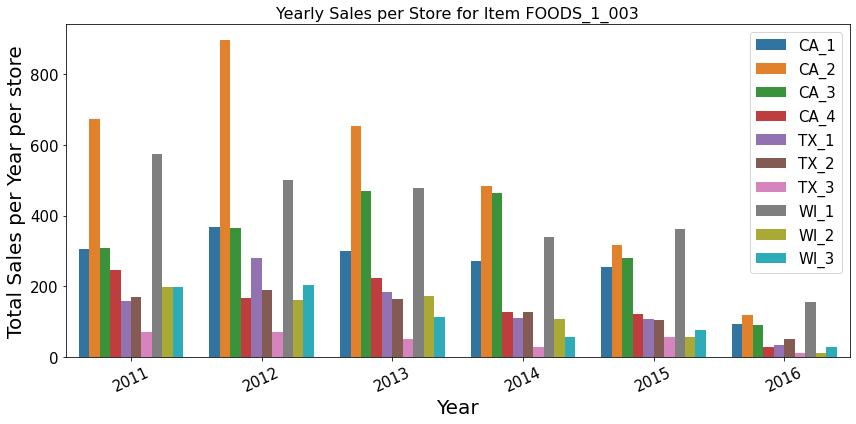

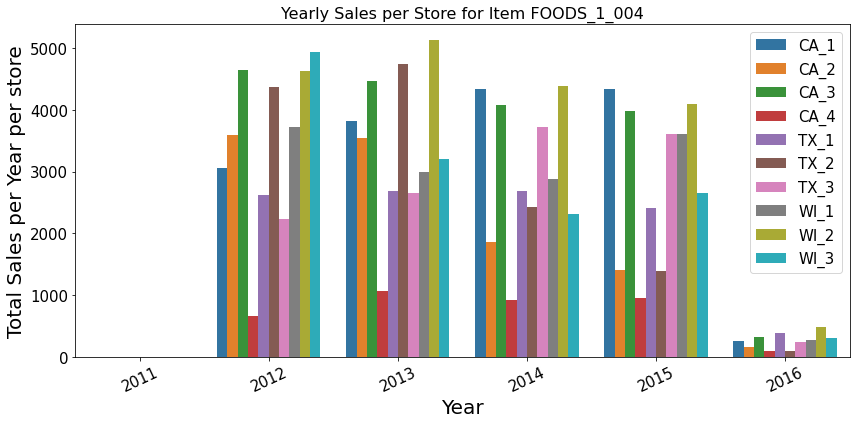

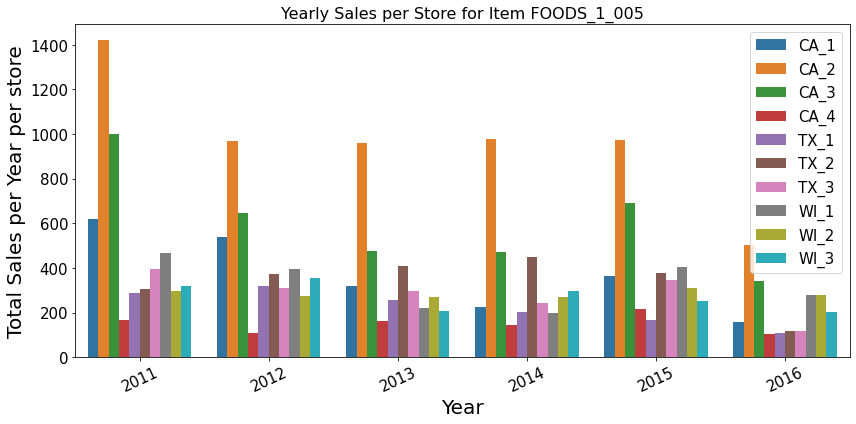

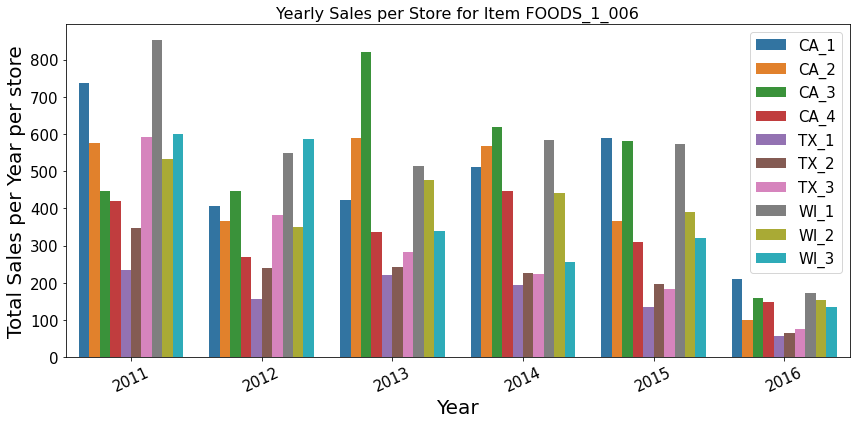

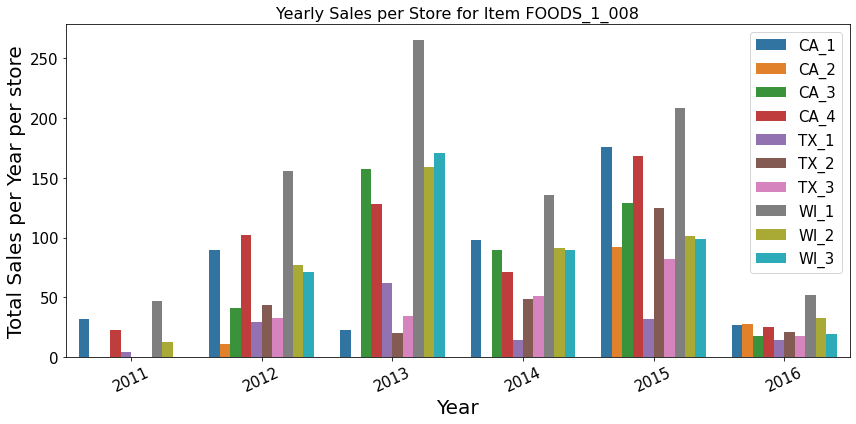

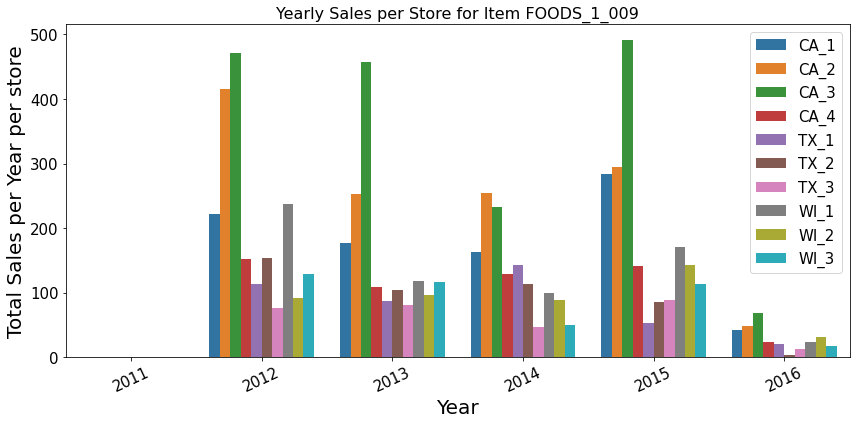

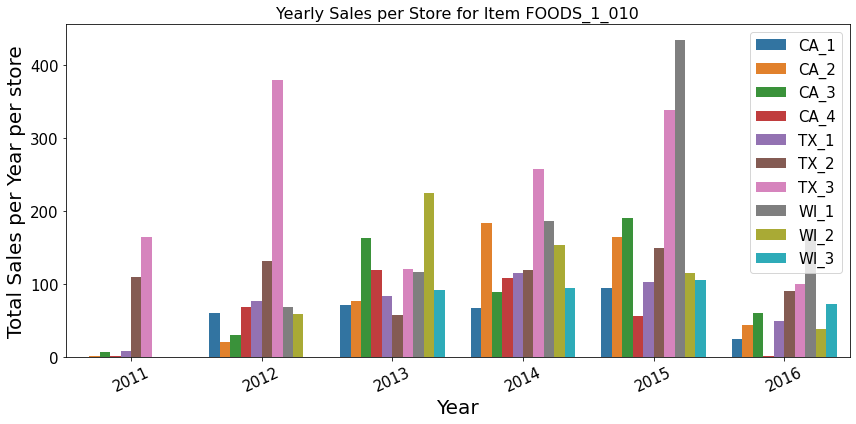

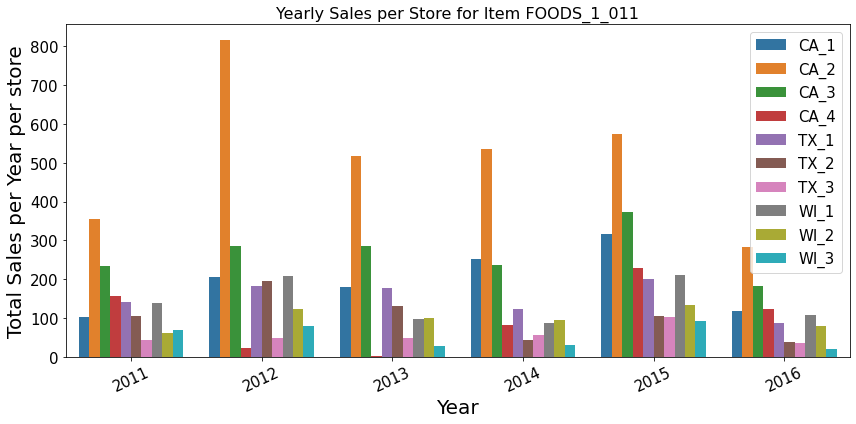

In [563]:
# Group by 'item_id', 'year', and 'store_id', then sum the 'sales' for each item, store and year
yearly_sales_per_storeitem = sales.groupby(['item_id', 'year','store_id'])['sales'].sum().reset_index()

# Plotting total yearly sales for each item using line plot
for item in yearly_sales_per_storeitem['item_id'].unique():
    plt.figure(figsize=(12, 6))
    item_data = yearly_sales_per_storeitem[yearly_sales_per_storeitem['item_id'] == item]
    sns.barplot(x='year',y='sales',data=item_data,hue='store_id')
    plt.xlabel('Year', fontsize=20)
    plt.ylabel('Total Sales per Year per store', fontsize=20)
    plt.xticks(fontsize=15, rotation=25)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=15)
    plt.title('Yearly Sales per Store for 'f'Item {item}' , fontsize=16)
    plt.tight_layout()
    plt.show()

#### Total sales per weekday per item¶

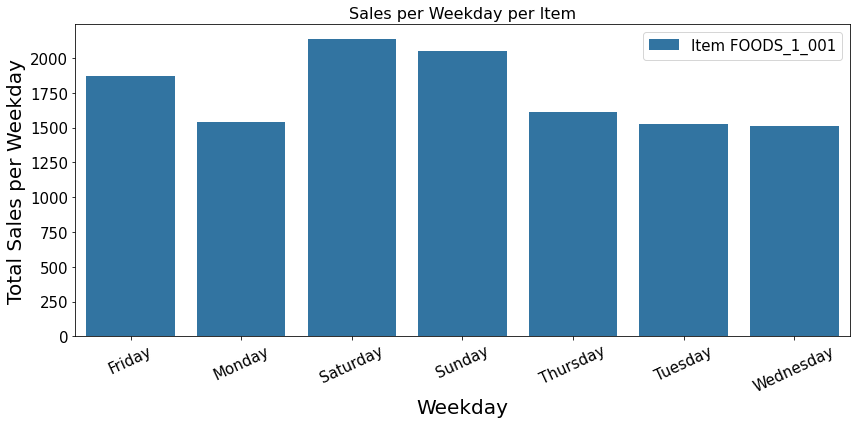

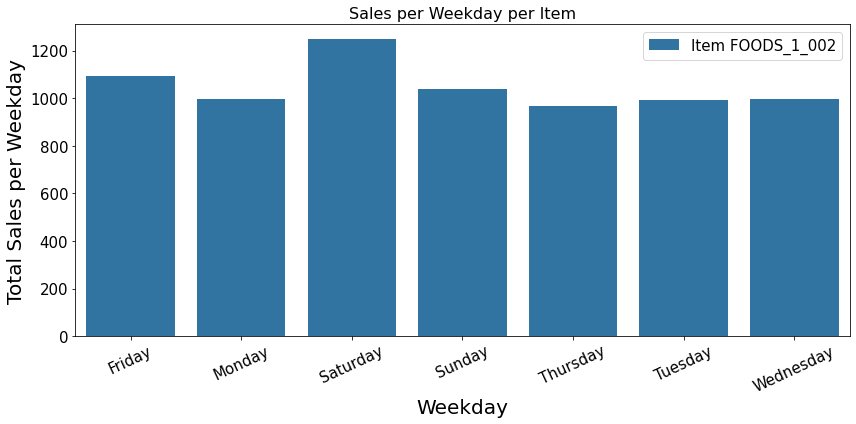

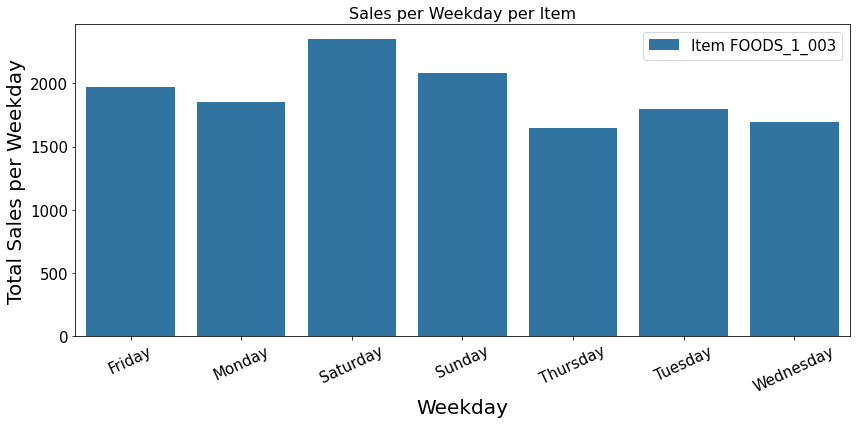

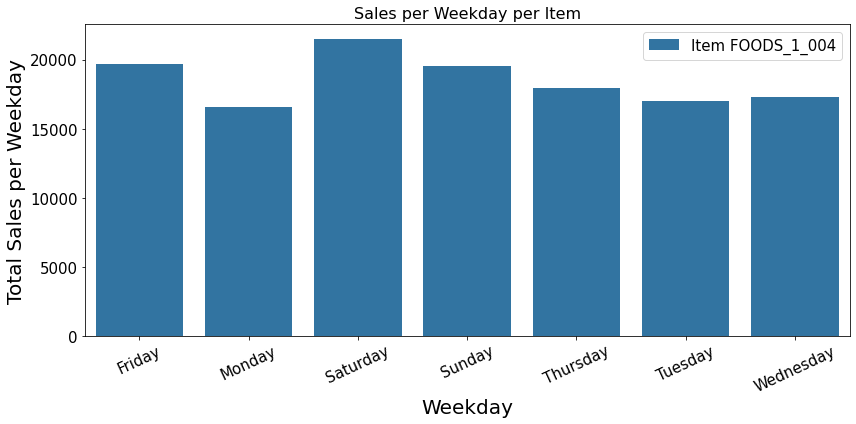

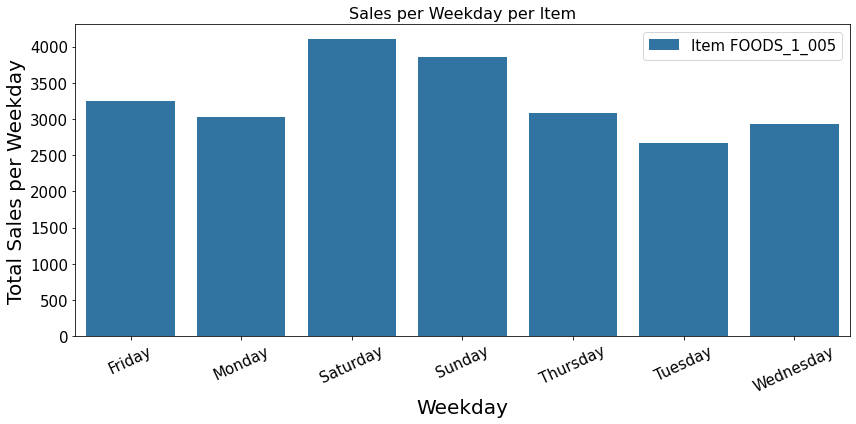

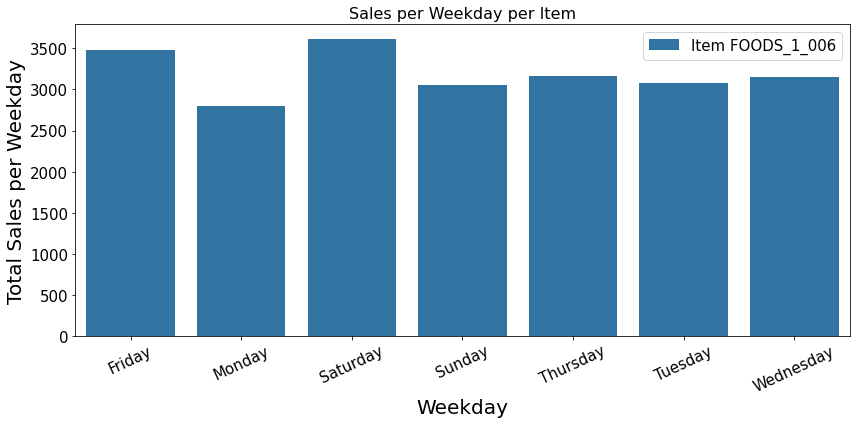

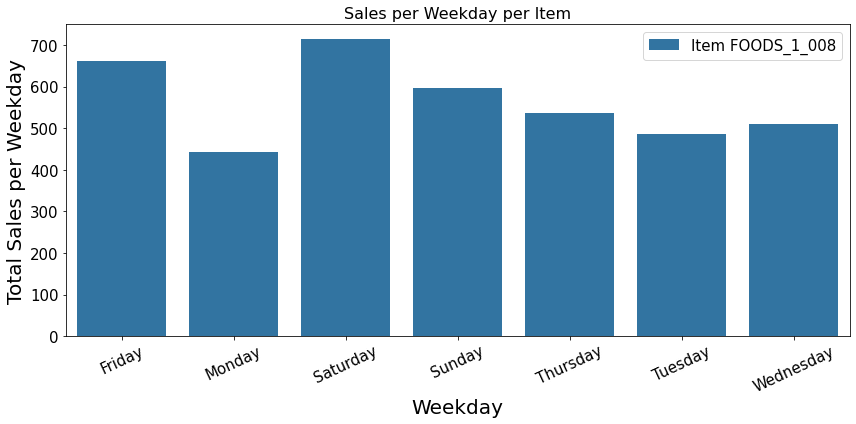

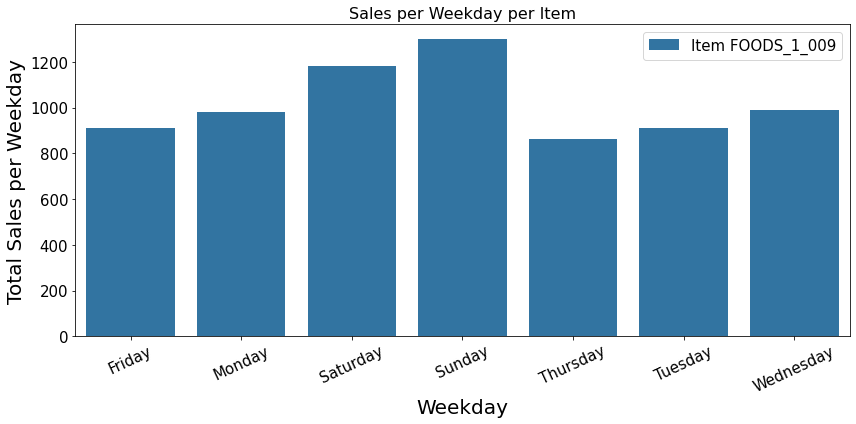

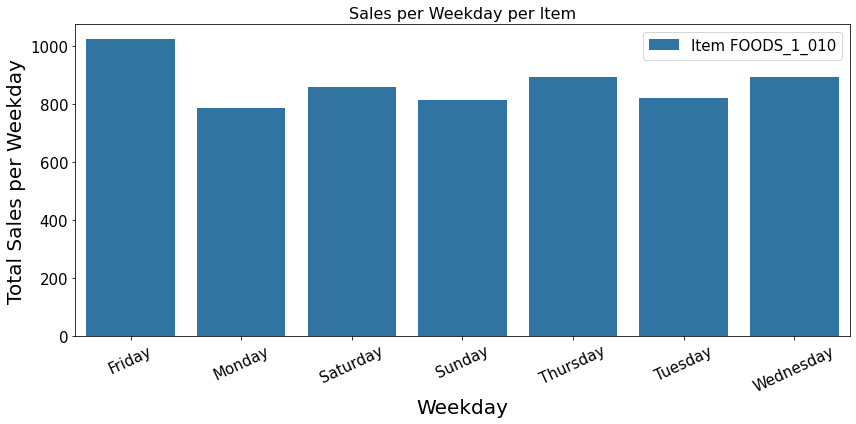

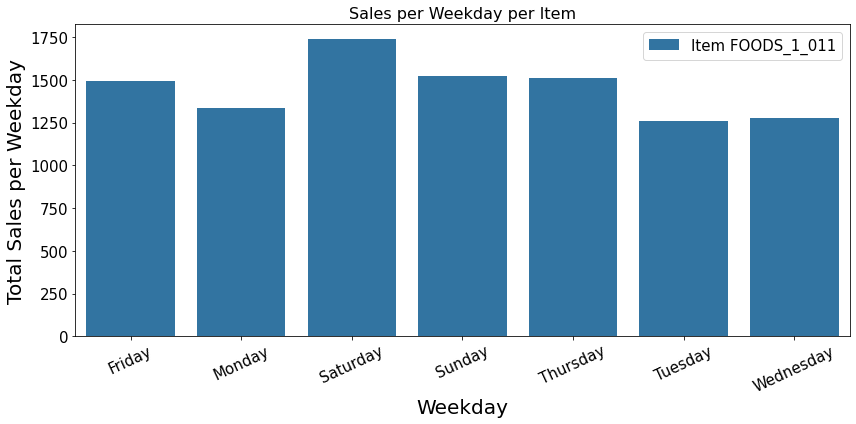

In [601]:
# Group by 'item_id' and weekday, then sum the 'sales' for each item and weekdays
weekday_sales_per_item = sales.groupby(['item_id', 'weekday'])['sales'].sum().reset_index()

# Plotting total weekday sales for each item using line plot
for item in weekday_sales_per_item['item_id'].unique():
    plt.figure(figsize=(12, 6))
    item_data = weekday_sales_per_item[weekday_sales_per_item['item_id'] == item]
    sns.barplot(x='weekday',y='sales',data=item_data,label=f'Item {item}')
    plt.xlabel('Weekday', fontsize=20)
    plt.ylabel('Total Sales per Weekday', fontsize=20)
    plt.xticks(fontsize=15, rotation=25)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=15)
    plt.title('Sales per Weekday per Item', fontsize=16)
    plt.tight_layout()
    plt.show()

#### Total sales per stor per item

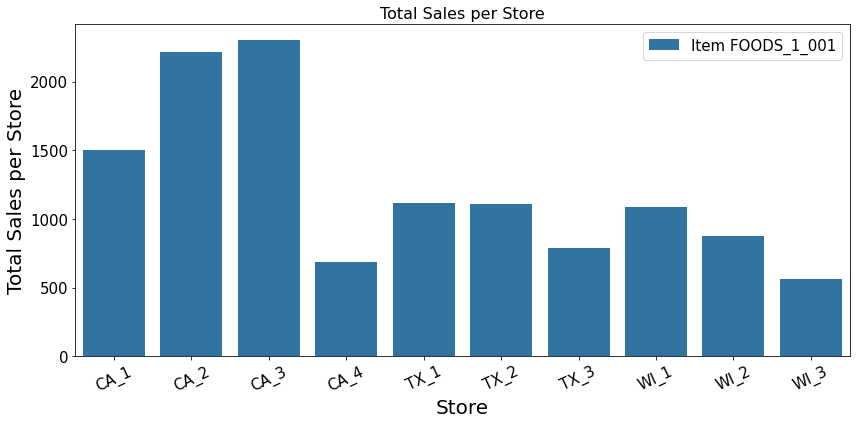

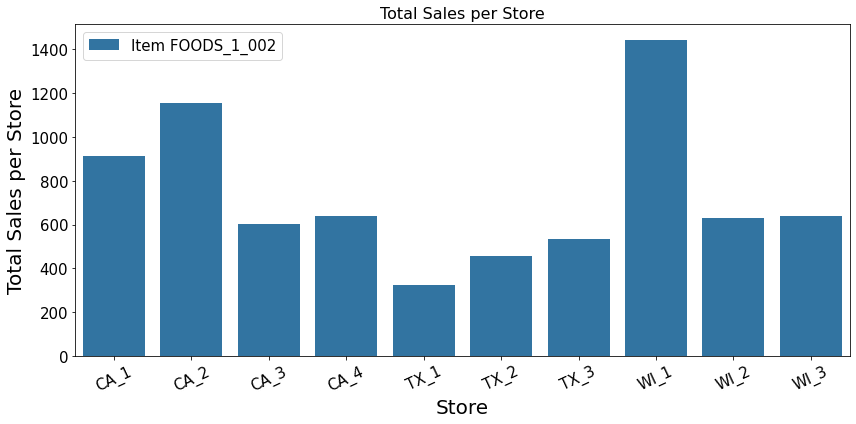

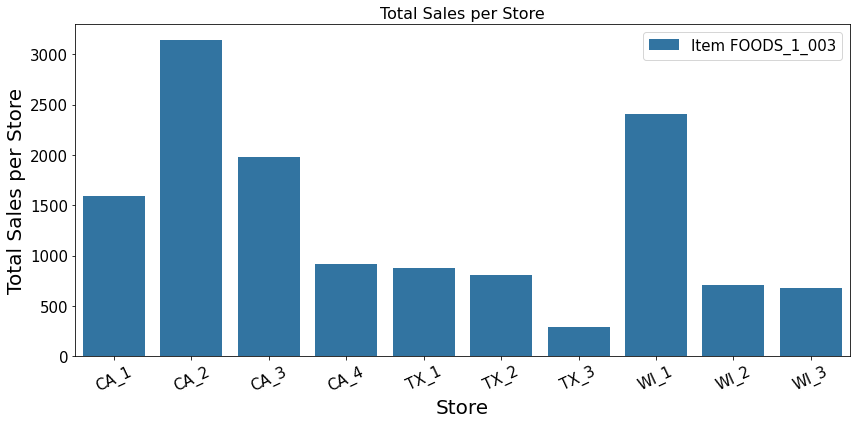

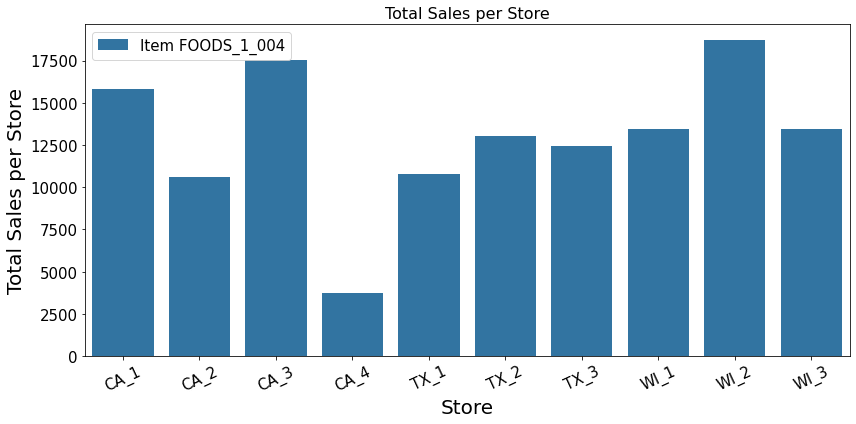

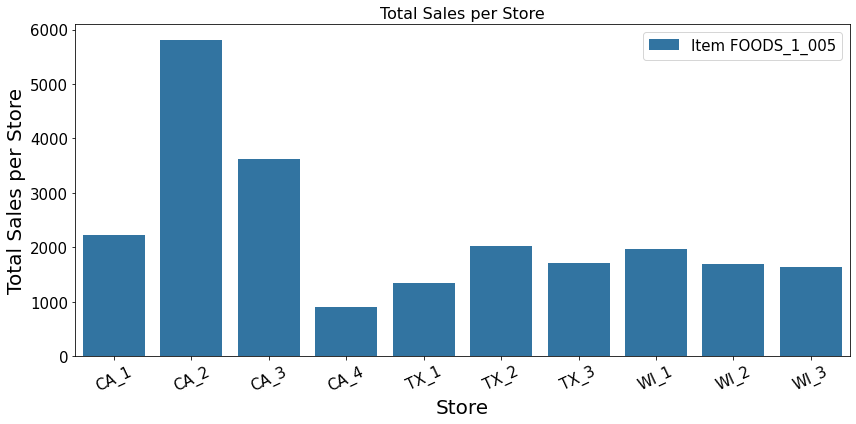

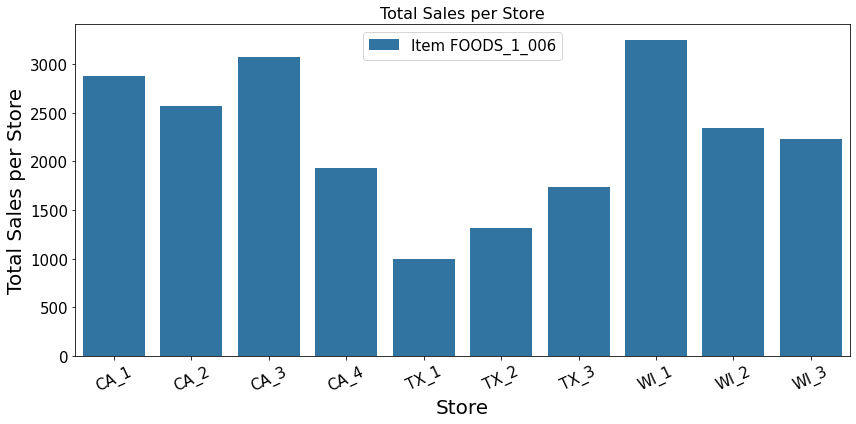

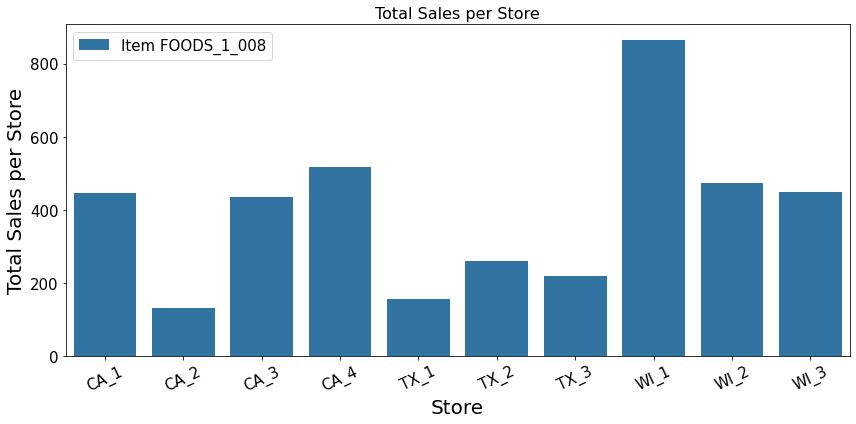

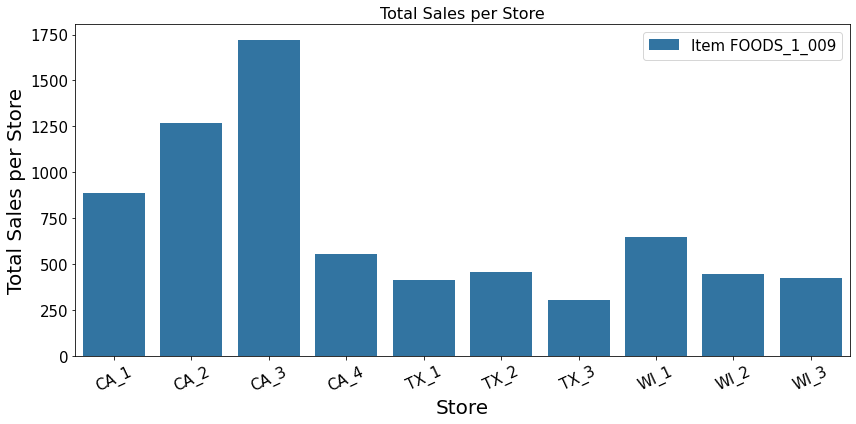

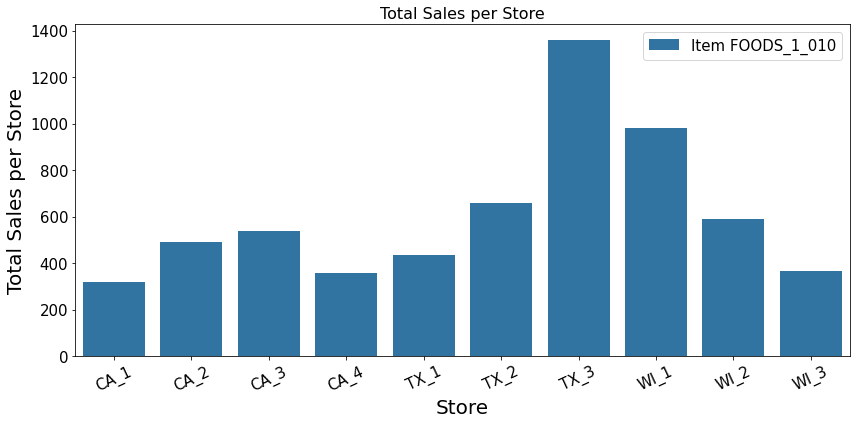

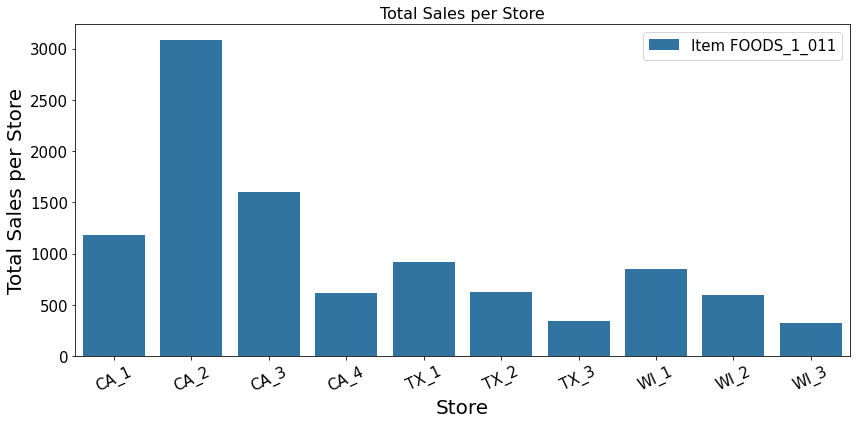

In [566]:
# Group by 'item_id' and 'store_id', then sum the 'sales' for each item and store 
sales_per_store_item = sales.groupby(['item_id','store_id'])['sales'].sum().reset_index()

# Plotting total yearly sales for each item using line plot
for item in sales_per_store_item['item_id'].unique():
    plt.figure(figsize=(12, 6))
    item_data = sales_per_store_item[sales_per_store_item['item_id'] == item]
    sns.barplot(x='store_id',y='sales',data=item_data, label=f'Item {item}')
    plt.xlabel('Store', fontsize=20)
    plt.ylabel('Total Sales per Store', fontsize=20)
    plt.xticks(fontsize=15, rotation=25)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=15)
    plt.title('Total Sales per Store' , fontsize=16)
    plt.tight_layout()
    plt.show()

#### Total Sales per Item, Store, State, and Year

In [594]:
# Define a function to draw barplot for total number of sales per some features
def plotsales(feature,label,title):
    # Group by 'item_id', then sum the 'sales' for each item  
    sales_per_store_item = sales.groupby(feature)['sales'].sum().reset_index() 
    # Plotting total yearly sales for each item using line plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature,y='sales',data=sales_per_store_item)
    plt.xlabel(label, fontsize=20)
    plt.ylabel('Total Sales', fontsize=20)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10)
    plt.title(title , fontsize=16)
    plt.show()

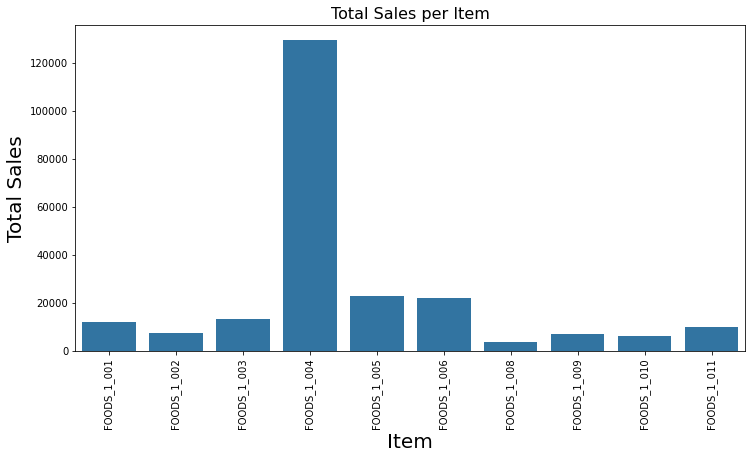

In [590]:
#Plot Total Sales per Item
plotsales('item_id', 'Item', 'Total Sales per Item')

Referring to the previous figures (total sales per item per year, store, and the overall number of sales per item), it's evident that Food_004 consistently exhibits the highest sales volume across all stores and dates, totaling more than 120,000 sales overall.  

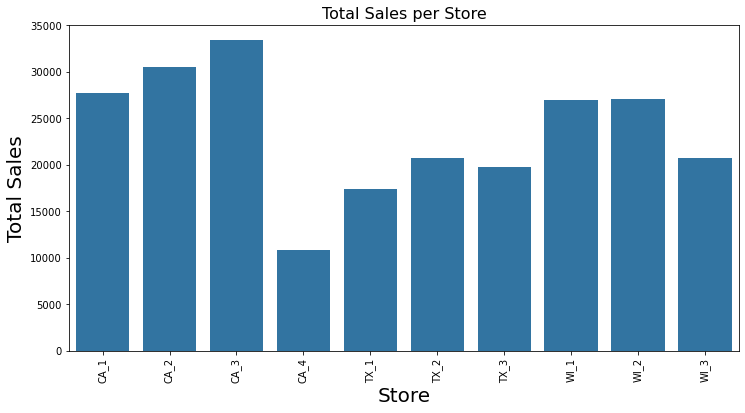

In [591]:
#Plot Total Sales per Store
plotsales('store_id', 'Store', 'Total Sales per Store')

The stores CA_3 and CA_2 have the highest number of sales overall. This trend is evident in other figures, such as the number of sales per store and per year per store, for most of the items.

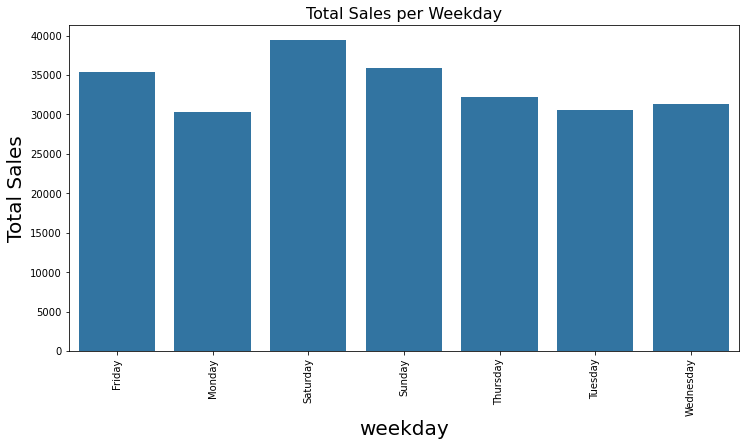

In [598]:
#Plot Total Sales per Weekdays
plotsales('weekday', 'weekday', 'Total Sales per Weekday')

As expected, Saturday has the highest number of sales among weekdays overall and for most items.

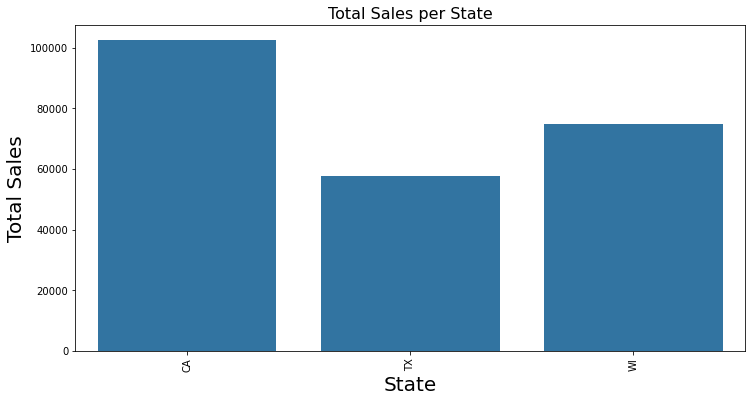

In [592]:
#Plot Total Sales per State
plotsales('state_id', 'State', 'Total Sales per State')

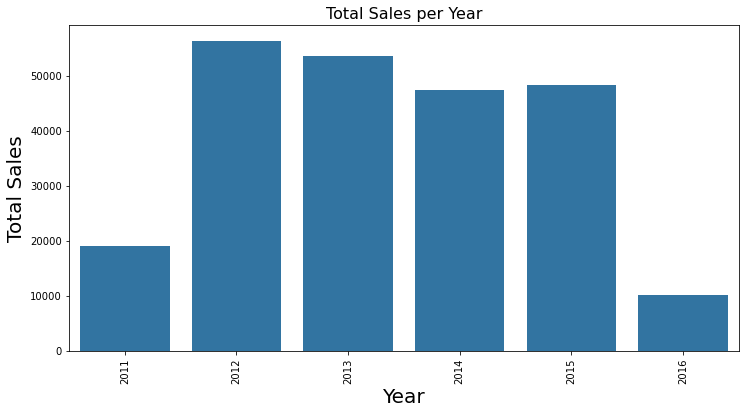

In [593]:
#Plot Total Sales per Year
plotsales('year', 'Year', 'Total Sales per Year')

Overall, the state of California has the highest number of sales among Texas, Wisconsin, and California. Additionally, the years 2012 and 2013 had the highest number of sales, respectively

By closely examining the number of sales for items, stores, years, and states, we can identify those that consistently contribute the most significant sales figures. This insight is crucial for refining our models and allocating resources effectively, as it directs our focus to key features that have a substantial impact on overall sales distribution. Furthermore, understanding the importance of these specific elements provides a foundation for strategic decision-making and targeted improvements in forecasting and planning processes.